# Sesión Práctica 1

En esta sesión exploraremos:
- Configuración del entorno (limpieza, instalación de paquetes, carga de datos).
- Exploración y edición de datos (`stargazer`, `tidyverse`, filtrado y manipulación).
- Generación de series de tiempo con bucles.
- Simulación de series de tiempo y análisis de convergencia.

## 1. Configuración y Manipulación de Datos
Uno de los paquetes más usados para manipular datos es **tidyverse**. Para instalarlo y cargarlo en R, usamos:

In [1]:
# Instalar y cargar tidyverse
PackageNames <- c("tidyverse", "stargazer", "magrittr", "moments")
for (i in PackageNames) {
    if (!require(i, character.only = T)) {
        install.packages(i, dependencies = T)
        require(i, character.only = T)
    }
}

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: stargazer


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Loading required package: magrittr


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract


Loading r

### Cargar y visualizar datos
Ejemplo con la base de datos integrada `mtcars`:

In [2]:
# Primeras filas del dataset
head(mtcars) 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [3]:
# Estadísticas descriptivas de todas las variables
stargazer(mtcars, type = "text") 


Statistic N   Mean   St. Dev.  Min     Max  
--------------------------------------------
mpg       32 20.091   6.027   10.400 33.900 
cyl       32  6.188   1.786     4       8   
disp      32 230.722 123.939  71.100 472.000
hp        32 146.688  68.563    52     335  
drat      32  3.597   0.535   2.760   4.930 
wt        32  3.217   0.978   1.513   5.424 
qsec      32 17.849   1.787   14.500 22.900 
vs        32  0.438   0.504     0       1   
am        32  0.406   0.499     0       1   
gear      32  3.688   0.738     3       5   
carb      32  2.812   1.615     1       8   
--------------------------------------------


In [4]:
# Estadísticas descriptivas de las variables mpg y hp	
stargazer(mtcars[, c("mpg", "hp")], type = "text")


Statistic N   Mean   St. Dev.  Min    Max  
-------------------------------------------
mpg       32 20.091   6.027   10.400 33.900
hp        32 146.688  68.563    52    335  
-------------------------------------------


In [5]:
# Cambiar el nombre de variables
mtcars <- rename(
    mtcars,
    mil_per_gal = mpg,
    horse_pow = hp # primero se pone el nombre nuevo y luego el antiguo
)

In [6]:
# Estadísticas descriptivas de las variables mpg y hp con nombres cambiados
stargazer(select(
    mtcars,
    mil_per_gal, horse_pow
), type = "text")


Statistic   N   Mean   St. Dev.  Min    Max  
---------------------------------------------
mil_per_gal 32 20.091   6.027   10.400 33.900
horse_pow   32 146.688  68.563    52    335  
---------------------------------------------


## 2. Series de Tiempo

### 2.1 Crear manualmente una serie de tiempo
Podemos crear una serie de tiempo con la función `ts()`:

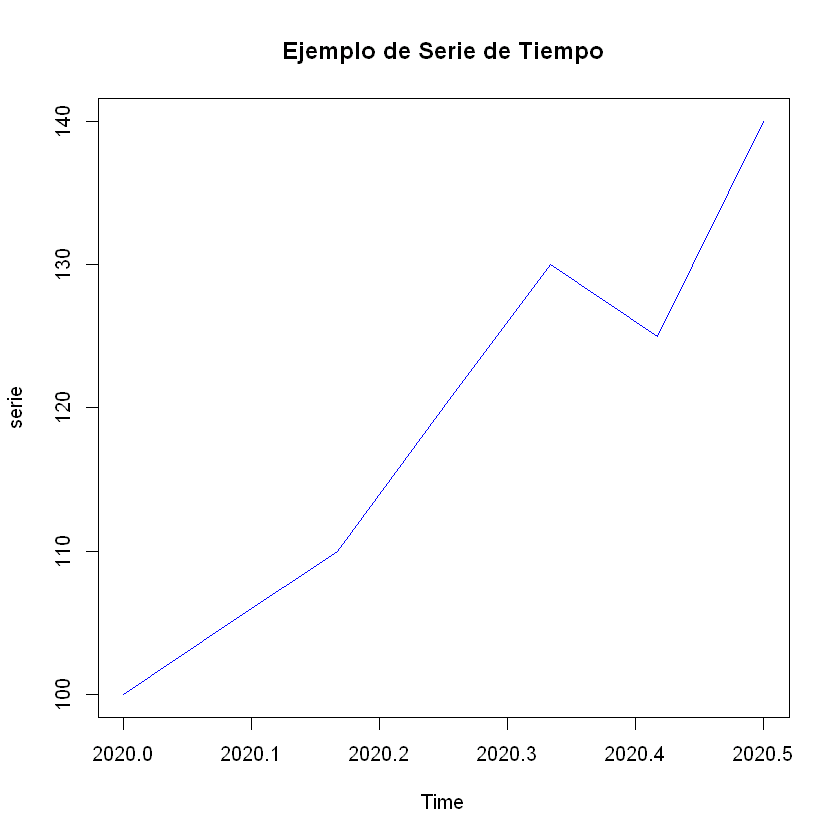

In [7]:
# Crear una serie de tiempo simple
datos <- c(100, 105, 110, 120, 130, 125, 140)
serie <- ts(datos, start = c(2020, 1), frequency = 12) # Datos mensuales
plot(serie, main = "Ejemplo de Serie de Tiempo", col = "blue")

### 2.2 Cargar una serie de tiempo Real
Podemos cargar una serie de tiempo económica desde R:

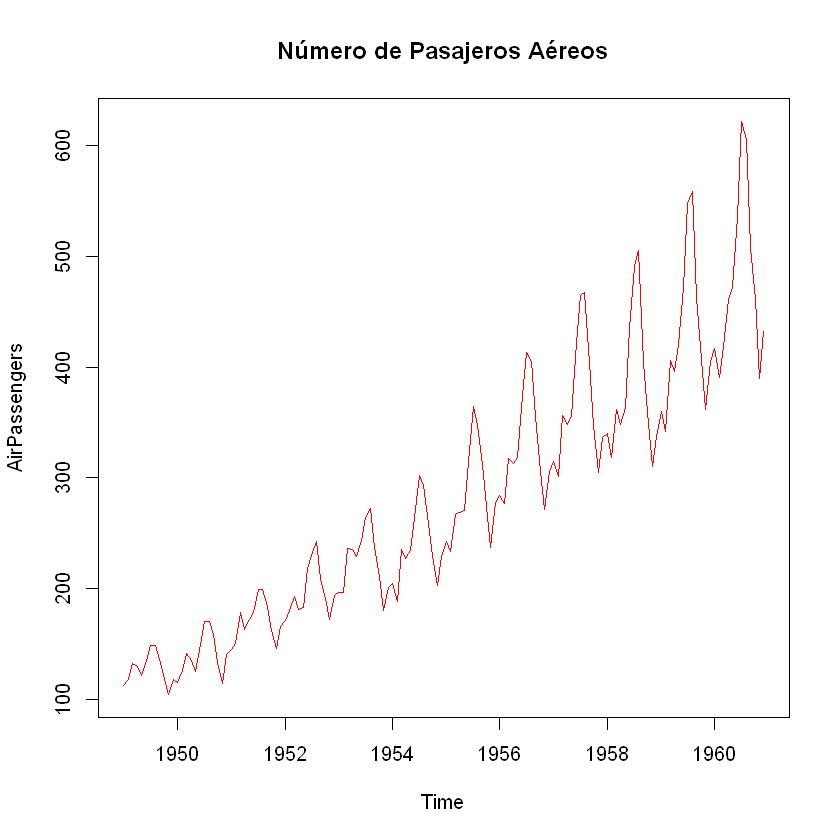

In [8]:
# Cargar datos de series de tiempo de AirPassengers
data(AirPassengers)
plot(AirPassengers, main = "Número de Pasajeros Aéreos", col = "red")

### 2.3 Generación de series de tiempo con bucles
Consideremos el siguiente proceso autoregresivo (Ecuación en diferencia de 1er orden): 
$$ y_t = a_0 + a_1 y_{t-1} + \varepsilon_t \tag{1}$$

Sabemos que la solución está dada por:
$$ y_t = a_0 \sum_{i=0}^{t-1} a_1^i + a_1^t y_0 + \sum_{i=0}^{t-1} a_1^i \varepsilon_{t-i} $$

Donde:
- $a_0$ es el intercepto
- $a_1$ es el coeficiente de persistencia.
- $\varepsilon_t \sim N(0, \sigma^2) $ es el término de error.

Simulemos una serie de tiempo AR(1)*, es decir, la ecuación (1):

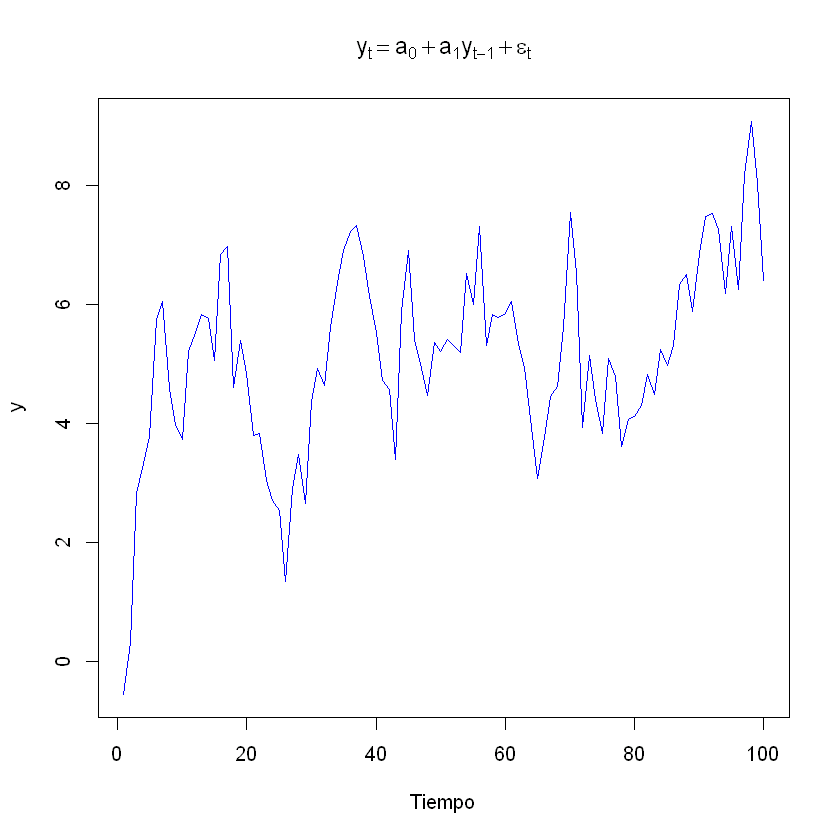

In [9]:
set.seed(123) # Para reproducibilidad
n <- 100 # Número de observaciones
a0 <- 1 # Intercepto
a1 <- 0.8 # Persistencia

y <- numeric(n)
epsilon <- rnorm(n, mean = 0, sd = 1) # Errores aleatorios con distribución normal

# Inicializamos la serie
y[1] <- epsilon[1]

# Generamos la serie con un loop
for (t in 2:n) {
    y[t] <- a0 + a1 * y[t - 1] + epsilon[t]
}

# Graficamos la serie generada
plot(y,
    type = "l",
    main = expression(y[t] == a[0] + a[1] * y[t - 1] + epsilon[t]), 
    col = "blue",
    xlab = "Tiempo",
    ylab = "y"
)

### 2.4 Usar funciones y bucles

El objetivo es construir una función en **R** que permita simular este proceso de manera flexible, para lo cual, necesitaremos especificar los siguientes parámetros:

- **$n$**: Número de períodos a simular.
- **$a_0$**: Intercepto opcional.
- **$a_1$**: Coeficiente autoregresivo.
- **$y_0$**: Condición inicial.
- **$\mu$**: Media del término de error.
- **$\sigma^2$**: Desviación estándar del término de error.


Esta función permitirá generar distintas trayectorias de un proceso **AR(1)** para realizar análisis de convergenncia.

In [10]:
gen_ar1 <- function(n, a0 = 0, a1, y0, mean_error = 0, sd_error = 0.1) {
    # Podemos definir valores por defecto para los argumentos, como la media y desviación estándar de los errores

    # Definir un vector para almacenar la serie
    y <- numeric(n)
    # Generar los errores aleatorios que siguen una distribución normal
    # En este caso, lo definimos como ruido blanco Gaussiano
    epsilon <- rnorm(n, mean = mean_error, sd = sd_error)
    # Inicializar la serie
    y[1] <- y0

    # Generar la serie AR(1) con un bucle
    for (t in 2:n) {
        y[t] <- a0 + a1 * y[t - 1] + epsilon[t]
    }

    # Devolver la serie generada como resultado de la función
    return(y)
}

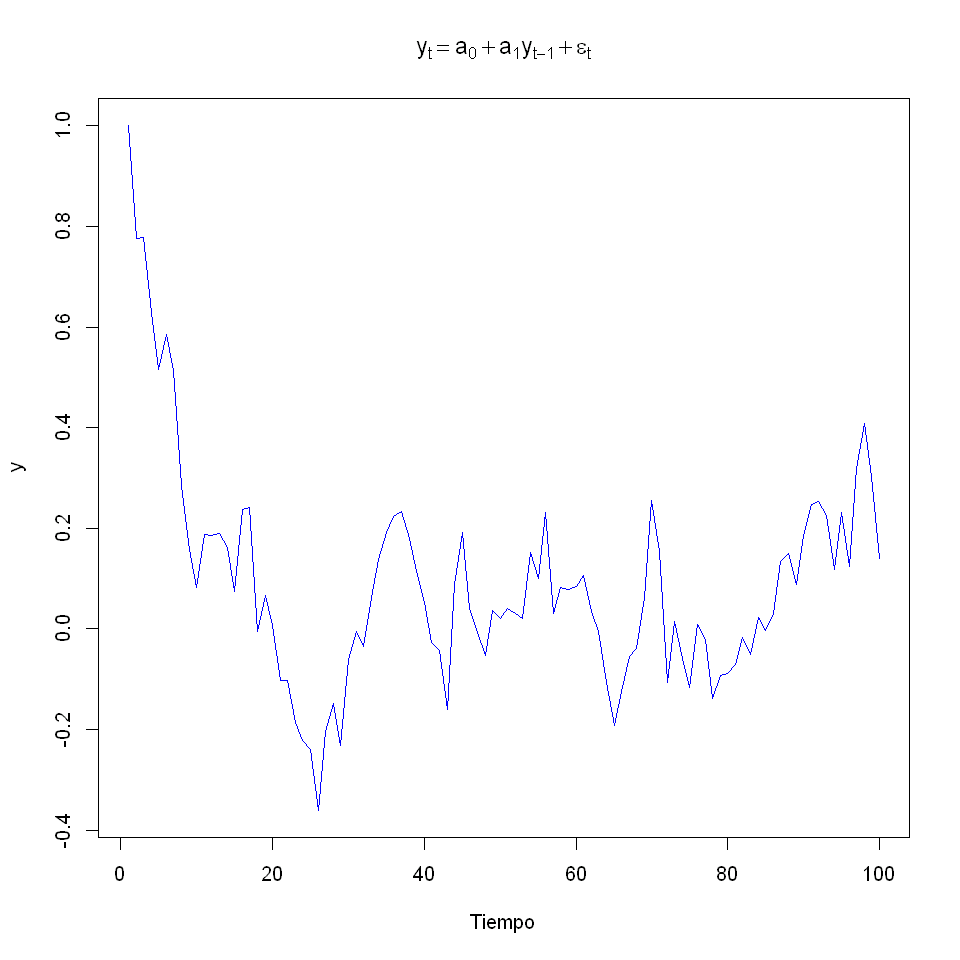

In [11]:
# Ejemplo de uso de la función para generar una serie AR(1)
set.seed(123) # Para reproducibilidad
ar1_series <- gen_ar1(
    n = 100,
    a0 = 0,
    a1 = 0.8, 
    y0 = 1, 
    mean_error = 0, 
    sd_error = 0.1
)

# Ajustar tamaño del gráfico
options(repr.plot.width = 8, repr.plot.height = 8)

# Graficamos la serie generada
plot(ar1_series,
    type = "l",
    main = expression(y[t] == a[0] + a[1] * y[t - 1] + epsilon[t]),
    col = "blue",
    xlab = "Tiempo",
    ylab = "y"
)

### 2.3.1 Modificación de parámetros en la simulación
Podemos cambiar el valor de $a_1 $ para ver cómo afecta la convergencia de la serie.

- Si $ |a_1| < 1 $, la serie es **estacionaria** y converge a la media.
- Si $ |a_1| > 1 $, la serie es **explosiva**.
- Si $ a_1 = 1 $, la serie es un **random walk**.

#### Panel (a): $y_t = 0.9 y_{t-1} + \varepsilon_t$

Si $a_0 = 0$ y $a_1 = 0.9$ en la ecuación (1)


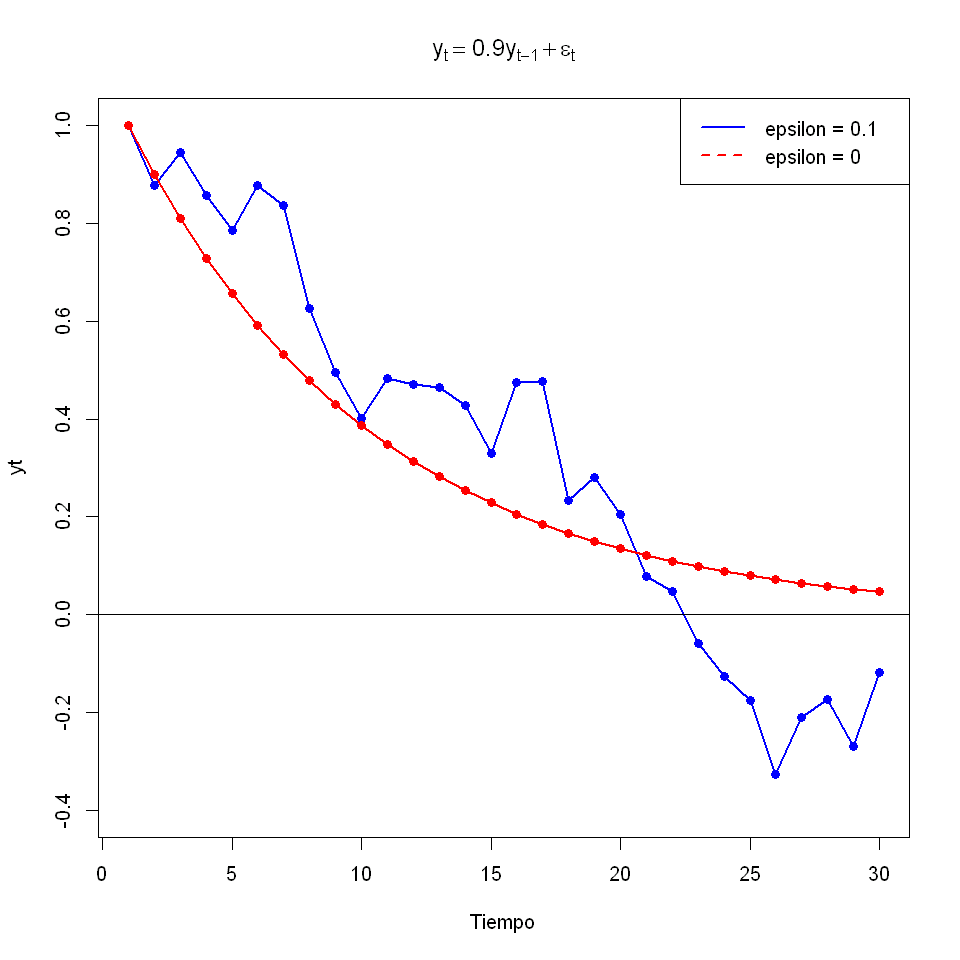

In [12]:
# Simulación de un proceso AR(1) con y_0 = 1
set.seed(123) # Para reproducibilidad

y1 <- gen_ar1(
    n = 30,
    a0 = 0,
    a1 = 0.9,
    y0 = 1,
    mean_error = 0,
    sd_error = 0.1
)
y2 <- gen_ar1(
    n = 30,
    a0 = 0,
    a1 = 0.9,
    y0 = 1,
    mean_error = 0,
    sd_error = 0
)

# Graficamos ambas series
plot(y1,
    type = "l", lwd = 2, col = "blue",
    main = expression(y[t] == 0.9 * y[t - 1] + epsilon[t]),
    xlab = "Tiempo", ylab = "yt",
    ylim = c(-0.4, 1)
) 

# Segunda serie en línea roja discontinua
lines(y2, col = "red", lwd = 2, lty = 1) 

# Agregar puntos a cada serie
points(y1, pch = 19, col = "blue")
points(y2, pch = 19, col = "red")

# Línea de referencia en 0
abline(h = 0, col = "black", lty = 1)

# Agregar leyenda para diferenciar las series
legend("topright",
    legend = c("epsilon = 0.1", "epsilon = 0"),
    col = c("blue", "red"), lwd = 2, lty = c(1, 2)
)


### Panel (b): $y_t = 0.5 y_{t-1} + \varepsilon_t$

Si $a_0 = 0$ y $a_1 = 0.5$ en la ecuación (1)

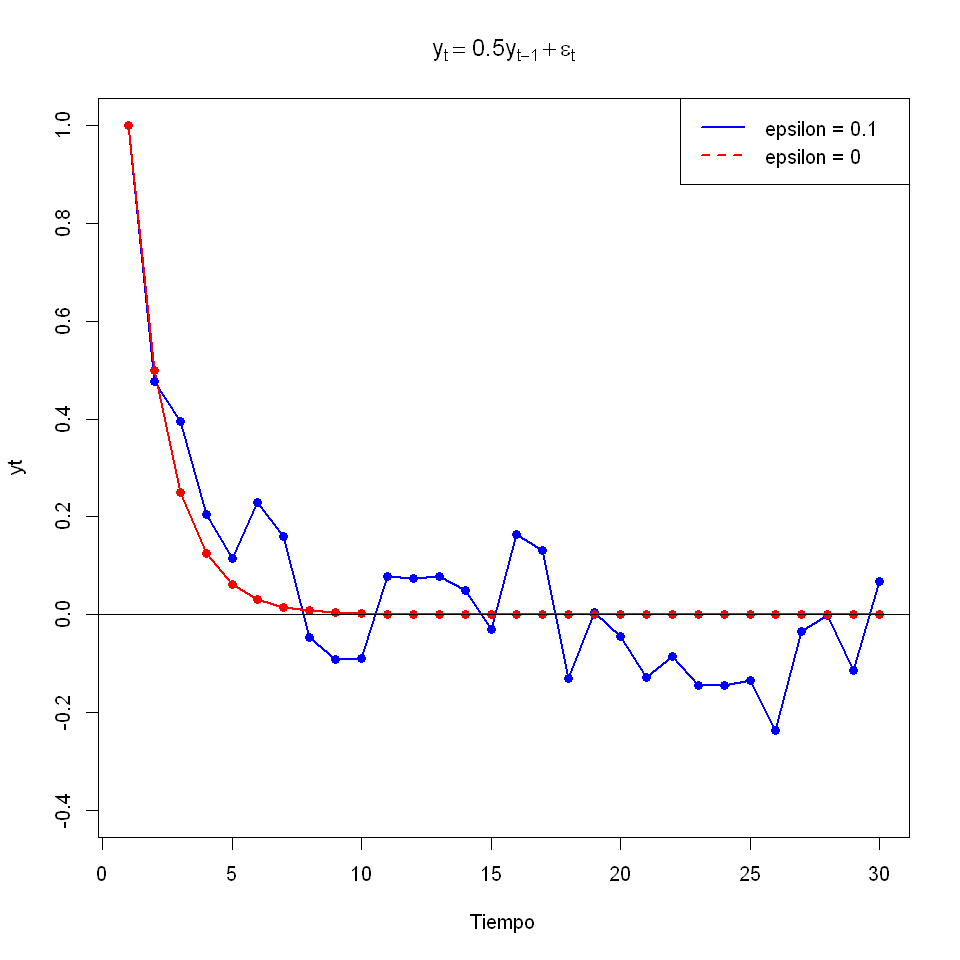

In [13]:
# Simulación de un proceso AR(1) con y_0 = 1
set.seed(123) # Para reproducibilidad

y1 <- gen_ar1(
    n = 30,
    a0 = 0,
    a1 = 0.5,
    y0 = 1,
    mean_error = 0,
    sd_error = 0.1
)
y2 <- gen_ar1(
    n = 30,
    a0 = 0,
    a1 = 0.5,
    y0 = 1,
    mean_error = 0,
    sd_error = 0
)

# Graficamos ambas series
plot(y1,
    type = "l", lwd = 2, col = "blue",
    main = expression(y[t] == 0.5 * y[t - 1] + epsilon[t]),
    xlab = "Tiempo", ylab = "yt",
    ylim = c(-0.4, 1)
) 

# Segunda serie en línea roja
lines(y2, col = "red", lwd = 2, lty = 1)

# Agregar puntos a cada serie
points(y1, pch = 19, col = "blue")
points(y2, pch = 19, col = "red")

# Línea de referencia en 0
abline(h = 0, col = "black", lty = 1)

# Agregar leyenda para diferenciar las series
legend("topright",
    legend = c("epsilon = 0.1", "epsilon = 0"),
    col = c("blue", "red"), lwd = 2, lty = c(1, 2)
)


Ambos gráficos juntos:

$y_t = 0.9 y_{t-1} + \varepsilon_t$ 

$y_t = 0.5 y_{t-1} + \varepsilon_t$

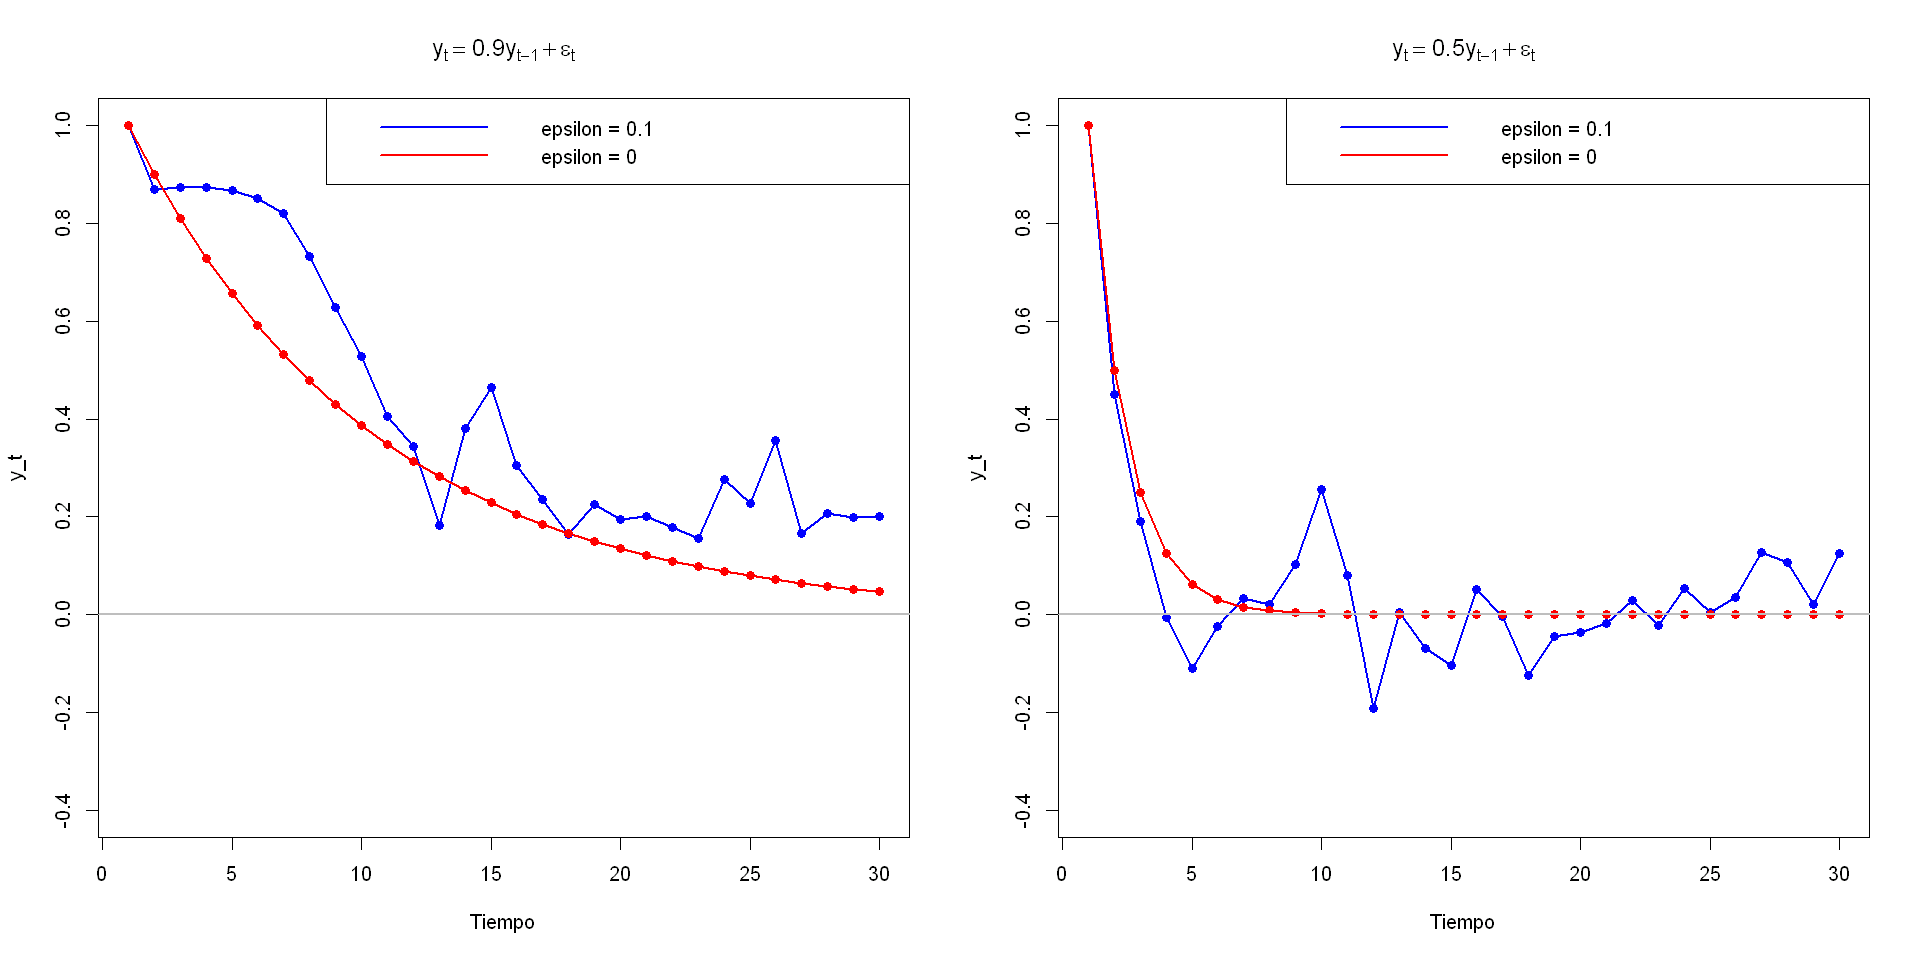

In [14]:
# Comparación de series con diferentes valores de a1
a1_values <- c(0.9, 0.5)
series_list <- list()
series_list2 <- list() 

for (a in a1_values) {
    y1 <- gen_ar1(
        n = 30,
        a0 = 0,
        a1 = a,
        y0 = 1,
        mean_error = 0,
        sd_error = 0.1
    )
    y2 <- gen_ar1(
        n = 30,
        a0 = 0,
        a1 = a,
        y0 = 1,
        mean_error = 0,
        sd_error = 0
    )
    series_list[[as.character(a)]] <- y1
    series_list2[[as.character(a)]] <- y2 
}

# Ajustar tamaño del gráfico 
options(repr.plot.width = 16, repr.plot.height = 8)

# Configurar gráficos en 1 fila y 2 columnas
par(mfrow = c(1, 2))

for (a in a1_values) {
    # Crear título
    titulo <- substitute(y[t] == a * y[t - 1] + epsilon[t], list(a = a))

    # Graficar serie 1
    plot(series_list[[as.character(a)]],
        type = "l",
        main = titulo, 
        col = "blue",
        lwd = 2,
        xlab = "Tiempo",
        ylab = "y_t",
        ylim = c(-0.4, 1)
    ) 

    # Graficar serie 2
    lines(series_list2[[as.character(a)]], col = "red", lwd = 2, lty = 1)
    
    # Agregar puntos a cada serie
    points(series_list[[as.character(a)]], pch = 19, col = "blue")
    points(series_list2[[as.character(a)]], pch = 19, col = "red")

    # Línea horizontal en y = 0
    abline(h = 0, col = "gray", lty = 1, lwd = 2)

    # Agregar leyenda
    legend("topright",
        legend = c("epsilon = 0.1", "epsilon = 0"),
        col = c("blue", "red"), lwd = 2, lty = c(1, 1)
    )
}



### Panel (c): $y_t = -0.5 y_{t-1} + \varepsilon_t$

Si $a_0 = 0$ y $a_1 = -0.5$ en la ecuación (1)

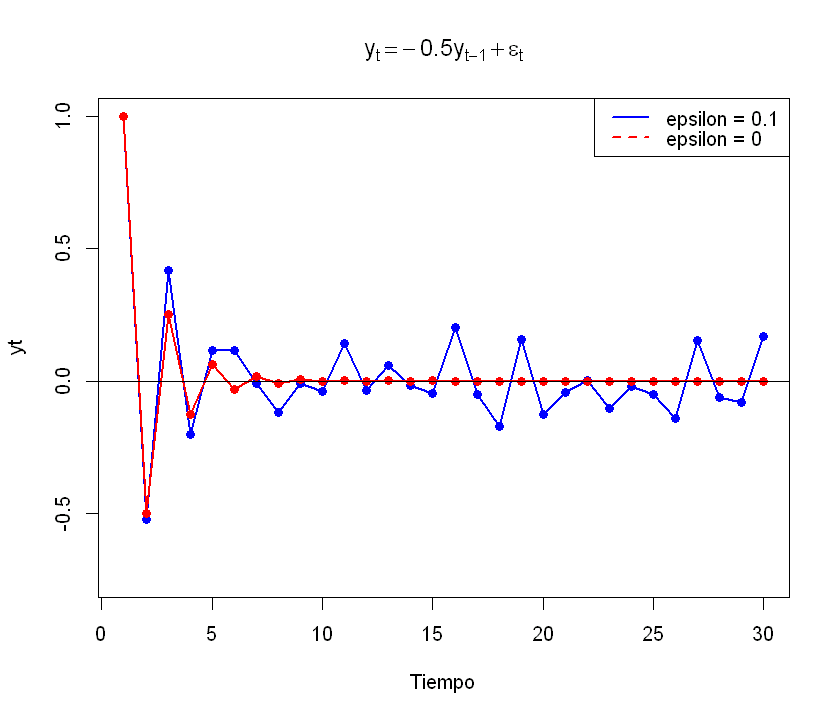

In [15]:
# Simulación de un proceso AR(1) con y_0 = 1
set.seed(123) # Para reproducibilidad

y1 <- gen_ar1(
    n = 30,
    a0 = 0,
    a1 = -0.5,
    y0 = 1,
    mean_error = 0,
    sd_error = 0.1
)
y2 <- gen_ar1(
    n = 30,
    a0 = 0,
    a1 = -0.5,
    y0 = 1,
    mean_error = 0,
    sd_error = 0
)

# Ajustar tamaño del gráfico
options(repr.plot.width = 7, repr.plot.height = 6)

# Graficamos ambas series
plot(y1,
    type = "l", lwd = 2, col = "blue",
    main = expression(y[t] == -0.5 * y[t - 1] + epsilon[t]),
    xlab = "Tiempo", ylab = "yt",
    ylim = c(-0.75, 1)
) 

# Segunda serie en línea roja discontinua
lines(y2, col = "red", lwd = 2, lty = 1)

# Agregar puntos a cada serie
points(y1, pch = 19, col = "blue")
points(y2, pch = 19, col = "red")

# Línea de referencia en 0
abline(h = 0, col = "black", lty = 1)

# Agregar leyenda para diferenciar las series
legend("topright",
    legend = c("epsilon = 0.1", "epsilon = 0"),
    col = c("blue", "red"), lwd = 2, lty = c(1, 2)
)


### Panel (d): $y_t = y_{t-1} + \varepsilon_t$

Si $a_0 = 0$ y $a_1 = 1$ en la ecuación (1)

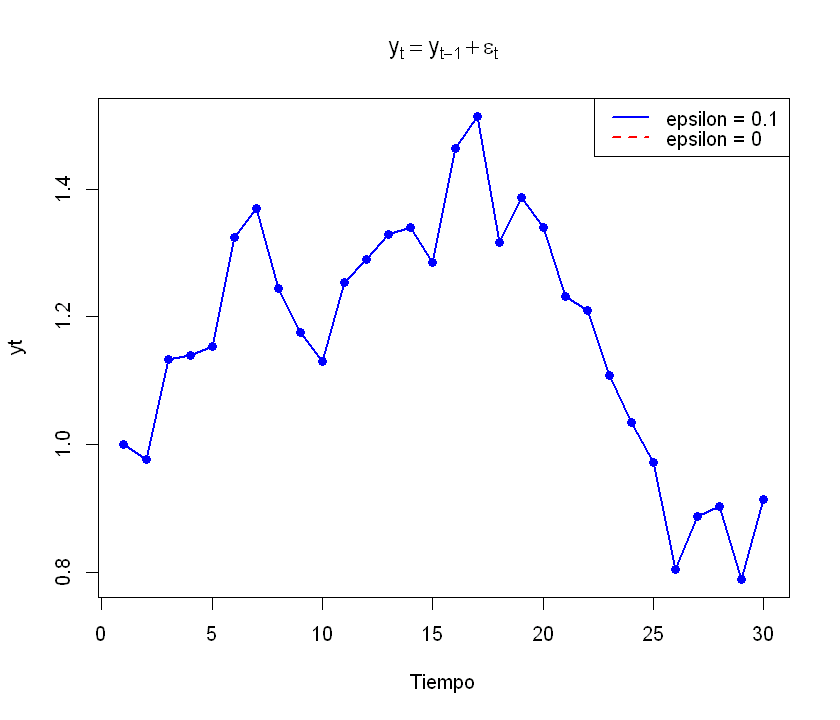

In [16]:
# Simulación de un proceso AR(1) con y_0 = 1
set.seed(123) # Para reproducibilidad

y1 <- gen_ar1(n = 30, a0 = 0, a1 = 1, y0 = 1, mean_error = 0, sd_error = 0.1)

# Ajustar tamaño del gráfico
options(repr.plot.width = 7, repr.plot.height = 6)

# Graficamos ambas series
plot(y1,
    type = "l", lwd = 2, col = "blue",
    main = expression(y[t] == y[t - 1] + epsilon[t]),
    xlab = "Tiempo", ylab = "yt"
)

# Agregar puntos a cada serie
points(y1, pch = 19, col = "blue")

# Línea de referencia en 0
abline(h = 0, col = "black", lty = 1)

# Agregar label
legend("topright",
    legend = c("epsilon = 0.1", "epsilon = 0"),
    col = c("blue", "red"), lwd = 2, lty = c(1, 2)
)


### Panel (e): $y_t = 1.2 y_{t-1} + \varepsilon_t$

Si $a_0 = 0$ y $a_1 = 1.2 $ en la ecuación (1)

### Panel (f): $y_t = -1.2 y_{t-1} + \varepsilon_t$

Si $a_0 = 0$ y $a_1 = -1.2 $ en la ecuación (1)

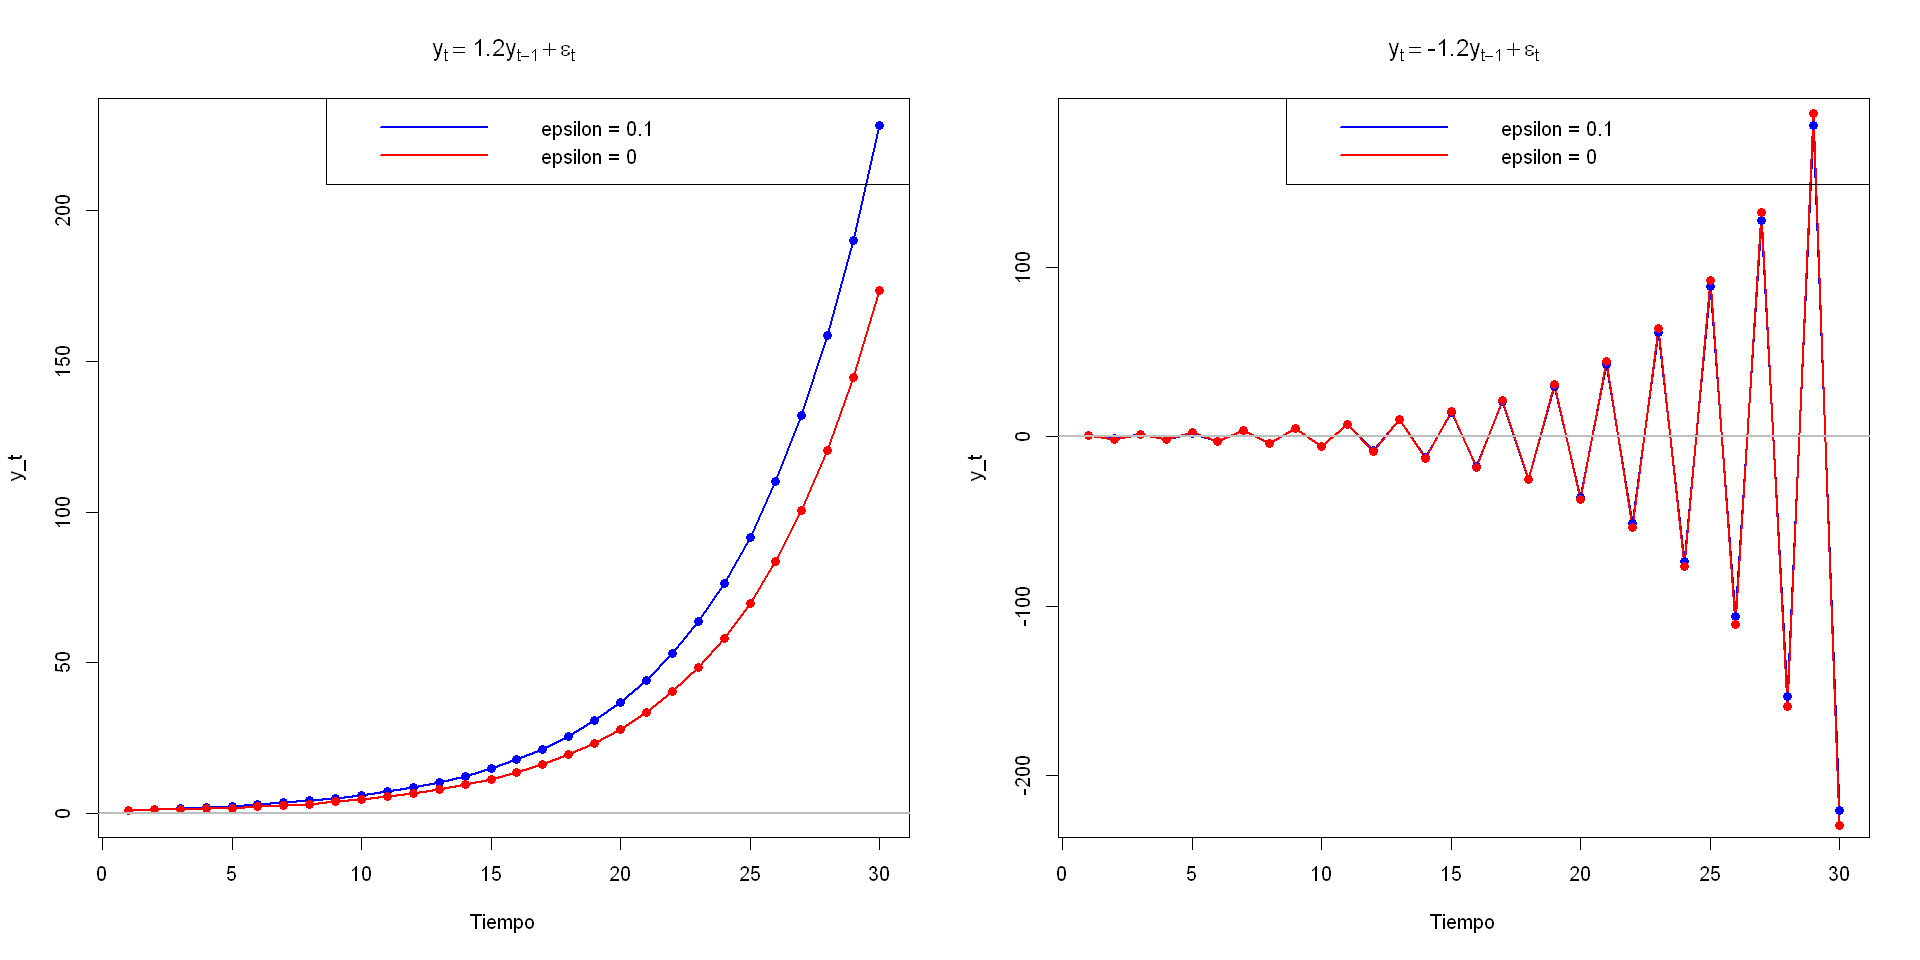

In [17]:
# Comparación de series con diferentes valores de a1
a1_values <- c(1.2, -1.2)
series_list <- list()
series_list2 <- list()

for (a in a1_values) {
    y1 <- gen_ar1(n = 30, a0 = 0, a1 = a, y0 = 1, mean_error = 0, sd_error = 0.1)
    y2 <- gen_ar1(n = 30, a0 = 0, a1 = a, y0 = 1, mean_error = 0, sd_error = 0.1)

    series_list[[as.character(a)]] <- y1
    series_list2[[as.character(a)]] <- y2
}

# Ajustar tamaño del gráfico
options(repr.plot.width = 16, repr.plot.height = 8)

# Configurar gráficos en 1 fila y 2 columnas
par(mfrow = c(1, 2))

for (a in a1_values) {
    # Crear título
    titulo <- substitute(y[t] == a * y[t - 1] + epsilon[t], list(a = a))

    # Graficar serie 1
    plot(series_list[[as.character(a)]],
        type = "l",
        main = titulo,
        col = "blue",
        lwd = 2,
        xlab = "Tiempo",
        ylab = "y_t"
    )

    # Graficar serie 2
    lines(series_list2[[as.character(a)]], col = "red", lwd = 2, lty = 1)

    # Agregar puntos a cada serie
    points(series_list[[as.character(a)]], pch = 19, col = "blue")
    points(series_list2[[as.character(a)]], pch = 19, col = "red")

    # Línea horizontal en y = 0
    abline(h = 0, col = "gray", lty = 1, lwd = 2)

    # Agregar leyenda
    legend("topright",
        legend = c("epsilon = 0.1", "epsilon = 0"),
        col = c("blue", "red"), lwd = 2, lty = c(1, 1)
    )
}


## 2.3.2 Generar un Proceso AR(2)

En esta sección, generamos un proceso autoregresivo de orden 2 AR(2), definido como:

$$ y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \varepsilon_t \tag{2}$$

donde $\varepsilon_t \sim N(0, \sigma^2)$ es el término de error (Ruido Blanco Gaussiano).

Vamos a simular (2) con valores específicos para $\phi_1$ y $\phi_2$, para lo cual podemos definir una nueva función.

In [18]:
# Defininr una función para simular un proceso AR(2) con un valor de a1 dado
gen_ar2 <- function(n, phi0 = 0, phi1, phi2, y0, mean_error = 0, sd_error = 0.1) {
    # Definir un vector para almacenar la serie
    y <- numeric(n)
    
    # Generar los errores aleatorios que siguen una distribución normal
    # En este caso, lo definimos como ruido blanco Gaussiano
    epsilon <- rnorm(n, mean = mean_error, sd = sd_error)
    
    # Inicializar la serie
    y[1] <- y0
    y[2] <- y0

    # Generar la serie AR(2) con un bucle
    for (t in 3:n) {
        y[t] <- phi0 + phi1 * y[t - 1] + phi2 * y[t - 2] + epsilon[t]
    }

    # Devolver la serie generada como resultado de la función
    return(y)
}

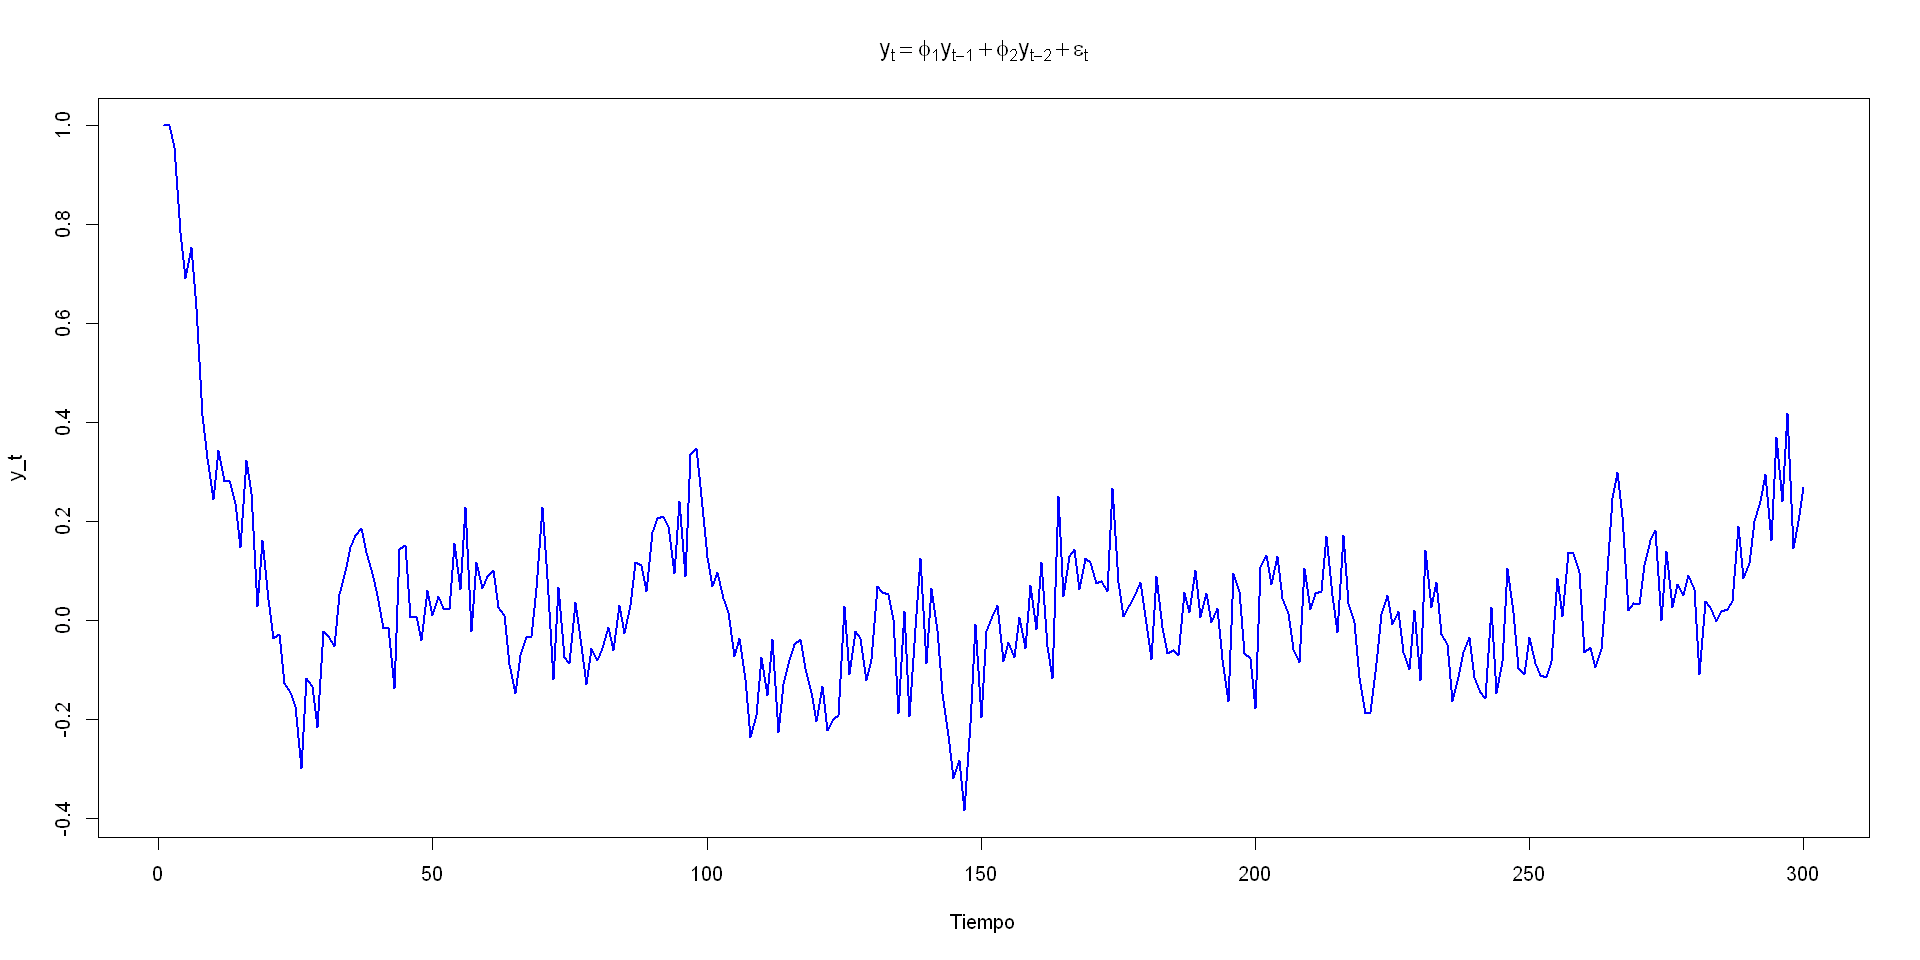

In [19]:
set.seed(123)
# Simulación de un proceso AR(2)
y1 <- gen_ar2(
    n = 300,
    phi0 = 0,
    phi1 = 0.5,
    phi2 = 0.3,
    y0 = 1,
    mean_error = 0,
    sd_error = 0.1
)

# Gráfico de la serie
plot(y1,
    type = "l",
    col = "blue", lwd = 2,
    main = expression(y[t] == phi[1] * y[t - 1] + phi[2] * y[t - 2] + epsilon[t]),
    xlab = "Tiempo", ylab = "y_t"
)

## 2.3.3 Series de Tiempo sin Condición Inicial Observable

Para evitar depender de condiciones iniciales arbitrarias, generamos una serie de tiempo AR(1) lo suficientemente larga y eliminamos los primeros 1000 períodos. 

Esto nos permite analizar los períodos restantes sin influencia de condiciones iniciales.

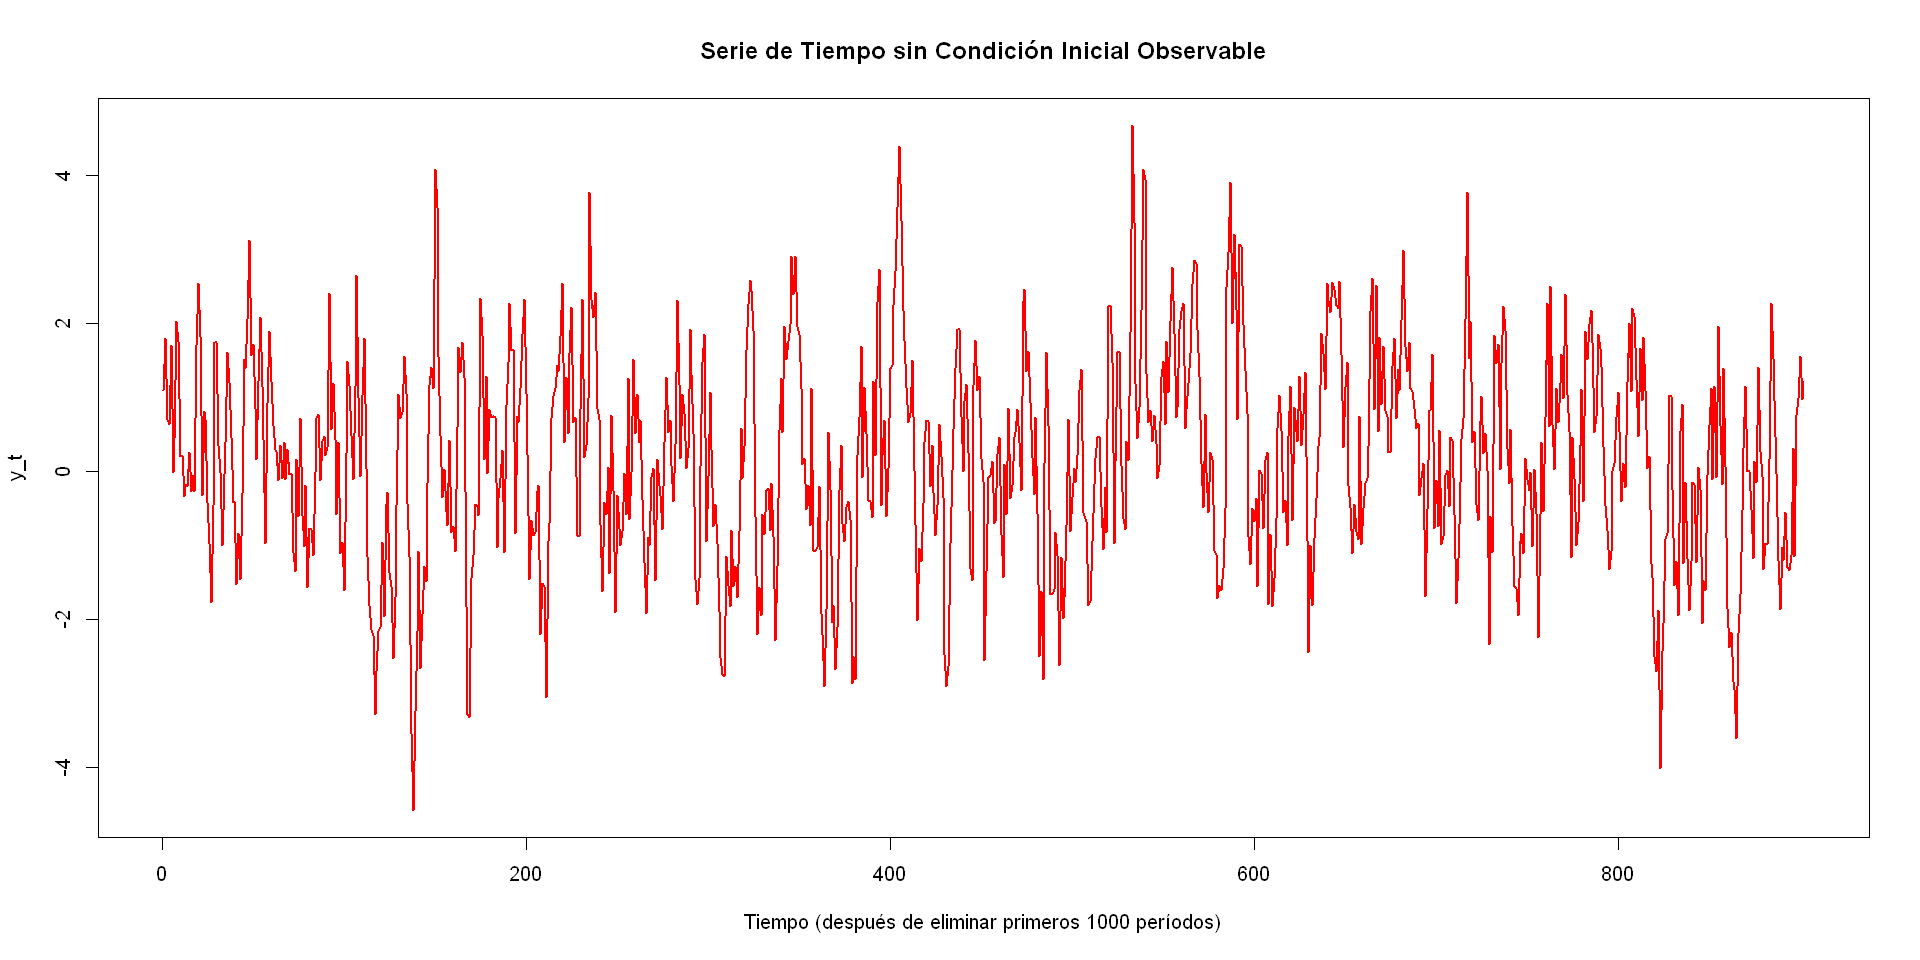

In [20]:
set.seed(456)
# Inicializar la serie AR(1)
y1 <- gen_ar1(
    n = 5000,
    a0 = 0,
    a1 = 0.7,
    y0 = 1,
    mean_error = 0,
    sd_error = 1
)

# Eliminamos los primeros 1000 períodos
y_trimmed <- y1[1001:n]

# Gráfico de la serie sin condición inicial observable
plot(y_trimmed,
    type = "l", col = "red", lwd = 2, 
    main = "Serie de Tiempo sin Condición Inicial Observable",
    xlab = "Tiempo (después de eliminar primeros 1000 períodos)", ylab = "y_t"
)

### 2.4 Análisis de Ergodicidad
Recordemos que, un proceso estacionario es ergódico si:
- El cálculo del promedio converge asintóticamente a la media poblacional:
$$ \frac{1}{T} \sum_{t=1}^{T} y_t \xrightarrow{p} E[Y] $$

Esto significa que el promedio temporal de una realización del proceso se aproxima al valor esperado poblacional, lo que permite hacer inferencias a partir de una única serie observada.

Si un proceso es **estacionario y ergódico**, entonces todas sus propiedades estadísticas pueden inferirse observando una única serie a lo largo del tiempo.

**Ejemplo de un Proceso Ergódico y No Ergódico**

**1. Proceso AR(1) Estacionario y Ergódico**

Si un proceso autoregresivo de primer orden **AR(1)** está definido como:

$$y_t = \phi y_{t-1} + \varepsilon_t, \quad \varepsilon_t \sim \mathcal{N}(0, \sigma^2)$$

y si $|\phi| < 1 $, entonces el proceso es **estacionario y ergódico**. En este caso, la media temporal de una serie larga de $ y_t $ convergerá a su valor esperado:

$$E[y_t] = \frac{c}{1 - \phi}$$

**2. Proceso No Ergodico: Random Walk**

$$y_t = y_{t-1} + \varepsilon_t$$

no es ergódico porque su media depende del valor inicial $y_0 $. En este caso, la media muestral no converge a una constante, sino que cambia con cada nueva realización del proceso.

Explicación:

Con una condición inicial $y_0$. Este proceso no tiene un término de retroalimentación (como en un AR(1)), lo que implica que el valor actual es simplemente la suma del valor anterior más un choque aleatorio.

Expandiendo recursivamente:

$$y_t = y_{t-1} + \varepsilon_t$$

$$y_t = (y_{t-2} + \varepsilon_{t-1}) + \varepsilon_t$$

$$y_t = (y_{t-3} + \varepsilon_{t-2}) + \varepsilon_{t-1} + \varepsilon_t$$

Generalizando:

$$y_t = y_0 + \sum_{i=1}^{t} \varepsilon_i$$


**Cálculo del valor esperado**

$$E[y_t] = E[y_0] + E\left[ \sum_{i=1}^{t} \varepsilon_i \right]$$

Dado que $E[\varepsilon_i] = 0 $:

$$E[y_t] = E[y_0] + \sum_{i=1}^{t} E[\varepsilon_i] = E[y_0] + 0$$

Por lo tanto,

$$E[y_t] = E[y_0]$$

Este resultado muestra que la media de $y_t$ **depende del valor inicial** $y_0$, lo que implica que la media muestral cambiará con cada realización del proceso.


#### Media en un AR(1) **sin intercepto**
$$
y_t = a_1 y_{t-1} + \varepsilon_t
$$

$$
E[y_t] = a_1 E[y_{t-1}] + E[\varepsilon_t]
$$

Dado que $ E[\varepsilon_t] = 0 $, la ecuación se simplifica a:

$$
E[y_t] = a_1 E[y_{t-1}]
$$

Si el proceso es **ergódico y estacionario**, entonces  $E[y_t] = E[y_{t-1}] = \mu$, lo que implica:

$$
\mu = a_1 \mu
$$

Resolviendo para $ \mu $:

$$
\mu (1 - a_1) = 0
$$

Por lo tanto, si $ |a_1| < 1 $ (condición de estacionariedad), la única solución es:

$$
E[y_t] = 0
$$

### 2.4.1 Demostración de ergodicidad en `R`
- Generamos un número $T$ de series con $n$ períodos.
- Calculamos la media empírica y comparamos con la teórica.
- Si es ergódica la serie, los valores serán iguales (aproximadamente).

In [21]:
# Generamos 1000 series simuladas
num_series <- 1000
series_matrix <- replicate(num_series, gen_ar1(n = 6000, a0 = 0, a1 = 0.7, y0 = 0, mean_error = 0, sd_error = 1))

# Convertimos la matriz en un dataframe para personalizar las filas y columnas
series_df <- as.data.frame(series_matrix)

# Cambiamos los nombres de las columnas
colnames(series_df) <- paste("yt_", 1:num_series)

# De modo que, la matriz nos queda con las dimensiones: [n x num_series]

# Veamos las primeras 10 series
head(series_df, 10)

,yt_ 1,yt_ 2,yt_ 3,yt_ 4,yt_ 5,yt_ 6,yt_ 7,yt_ 8,yt_ 9,yt_ 10,⋯,yt_ 991,yt_ 992,yt_ 993,yt_ 994,yt_ 995,yt_ 996,yt_ 997,yt_ 998,yt_ 999,yt_ 1000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.0000000,0.0000000,0.0000000,0.000000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000
2,-0.5883555,0.08482449,0.4196017,0.25878678,0.3314276,0.5966333,-0.7632422,1.0001662,-0.4030884,0.97115082,⋯,-0.8771638,-0.7063502,-1.9162483,-0.363942467,1.86430236,1.6740709,1.6116584,-1.3185210,-0.36998279,0.4999323
3,-0.3609451,0.24895293,-1.2901182,-1.32338162,1.2911883,1.8016478,-0.7802019,1.3113251,1.4274761,-0.87851380,⋯,-0.9331125,-0.7449850,-1.1632895,0.402683110,1.27561691,-0.2955330,0.7565486,-2.3918116,0.02592897,1.9024074
4,-0.2377593,1.49115613,-2.1513209,-1.10340546,0.8289217,2.2159235,-1.4026370,0.8245374,0.1288559,0.02668402,⋯,-1.1483988,-1.7078801,0.3205290,-2.044507578,0.10460810,0.1910857,1.2300511,-1.1607862,-0.02116385,1.4711931
5,0.2882920,1.42982227,-2.1611840,2.03837749,0.6058032,1.9539412,-2.3550656,0.6379958,0.4838792,1.44653190,⋯,0.2551328,-1.4423802,-0.7432615,-0.527113605,1.65144587,-0.3626529,-0.0168874,1.7828036,0.74005979,1.2204602
6,0.7456059,2.00736453,-1.8844139,0.03956606,-0.3665544,2.8618762,-1.7674948,0.3374779,-2.0965408,-0.50608518,⋯,0.3703350,-0.5175446,0.7402756,-2.183607925,1.98840250,0.4662462,-0.3522017,1.2941977,0.18516085,-0.5220074
7,1.4783674,3.21980106,-1.9873614,0.91208998,-1.8365035,1.4282941,-0.3659532,-0.7615761,-1.6792286,-0.83302637,⋯,0.9303641,-0.2411807,-0.4587813,-0.405294176,2.67855327,1.0828562,-1.1534656,1.4147558,-0.46050524,-1.7698812
8,-0.1911029,1.09740528,-1.7918911,1.06533996,-0.1244891,2.0224070,-1.4179979,-0.7050257,-1.7775824,0.18878951,⋯,1.5963959,-0.5545404,-1.0194440,-1.687990493,-0.08197297,2.8551206,-2.2204215,2.5360207,-0.23348996,-1.2644444
9,0.1367050,0.33074209,-0.5990414,2.39890849,-0.7299259,2.2153242,-1.2088288,-0.0895721,0.7565197,-0.93017520,⋯,2.6810680,2.1339664,1.2012163,-1.357478555,1.07555354,1.8111863,-2.1330731,-0.4502256,0.92735877,0.5561402


In [22]:
# Eliminar los primeros 1000 períodos de cada serie
series_trimmed <- series_df[1001:5000, ]

# Calculamos la media a lo largo del tiempo para cada periodo
time_means <- rowMeans(series_trimmed)

# Calculamos la media a lo largo de las series para cada periodo
series_means <- colMeans(series_trimmed)

# Comparación de las medias a lo largo del tiempo y de las series
cat("Media a lo largo del tiempo:", sprintf("%.6f", mean(time_means)), "\n")
cat("Media a lo largo de las series:", sprintf("%.6f", mean(series_means)), "\n")

Media a lo largo del tiempo: -0.000404 
Media a lo largo de las series: -0.000404 


In [23]:
# Calcular la media de cada serie a lo largo del tiempo (más eficiente que un loop)
matriz_medias_s <- matrix(colMeans(series_trimmed, na.rm = TRUE), nrow = 1)

# Calcular la media de cada período a lo largo de las series
matriz_medias_n <- matrix(rowMeans(series_trimmed, na.rm = TRUE), ncol = 1)

# Asignar nombres a las filas y columnas para mejor interpretación
colnames(matriz_medias_s) <- colnames(series_trimmed)
rownames(matriz_medias_n) <- rownames(series_trimmed)
colnames(matriz_medias_n) <- "Promedio_por_periodo"

# Convertir a data.frames para facilitar el manejo de datos
df_medias_s <- as.data.frame(matriz_medias_s)
df_medias_n <- as.data.frame(matriz_medias_n)

# Mostrar el promedio de la serie 600 
cat("Media de la serie 994 a lo largo del tiempo:", sprintf("%.6f", matriz_medias_s[1, 994]), "\n")

# Mostrar un resumen de los resultados
cat("Medias de las series:\n")
head(df_medias_s, n = 5)

cat("Medias de los períodos:\n")
tail(df_medias_n, n = 3) # Últimos 3 periodos


Media de la serie 994 a lo largo del tiempo: -0.035296 
Medias de las series:


,yt_ 1,yt_ 2,yt_ 3,yt_ 4,yt_ 5,yt_ 6,yt_ 7,yt_ 8,yt_ 9,yt_ 10,⋯,yt_ 991,yt_ 992,yt_ 993,yt_ 994,yt_ 995,yt_ 996,yt_ 997,yt_ 998,yt_ 999,yt_ 1000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.01186147,0.00376171,-0.0006722478,-0.03030944,0.001567268,0.01261831,-0.01299303,0.06865453,0.0417412,0.02277243,⋯,0.04311567,0.05912523,0.008549001,-0.03529643,0.1205446,-0.09305823,-0.03217693,-0.01558964,-0.005034526,0.009225129


Medias de los períodos:


,Promedio_por_periodo
,<dbl>
4998,-0.02983684
4999,-0.02042355
5000,-0.01517118


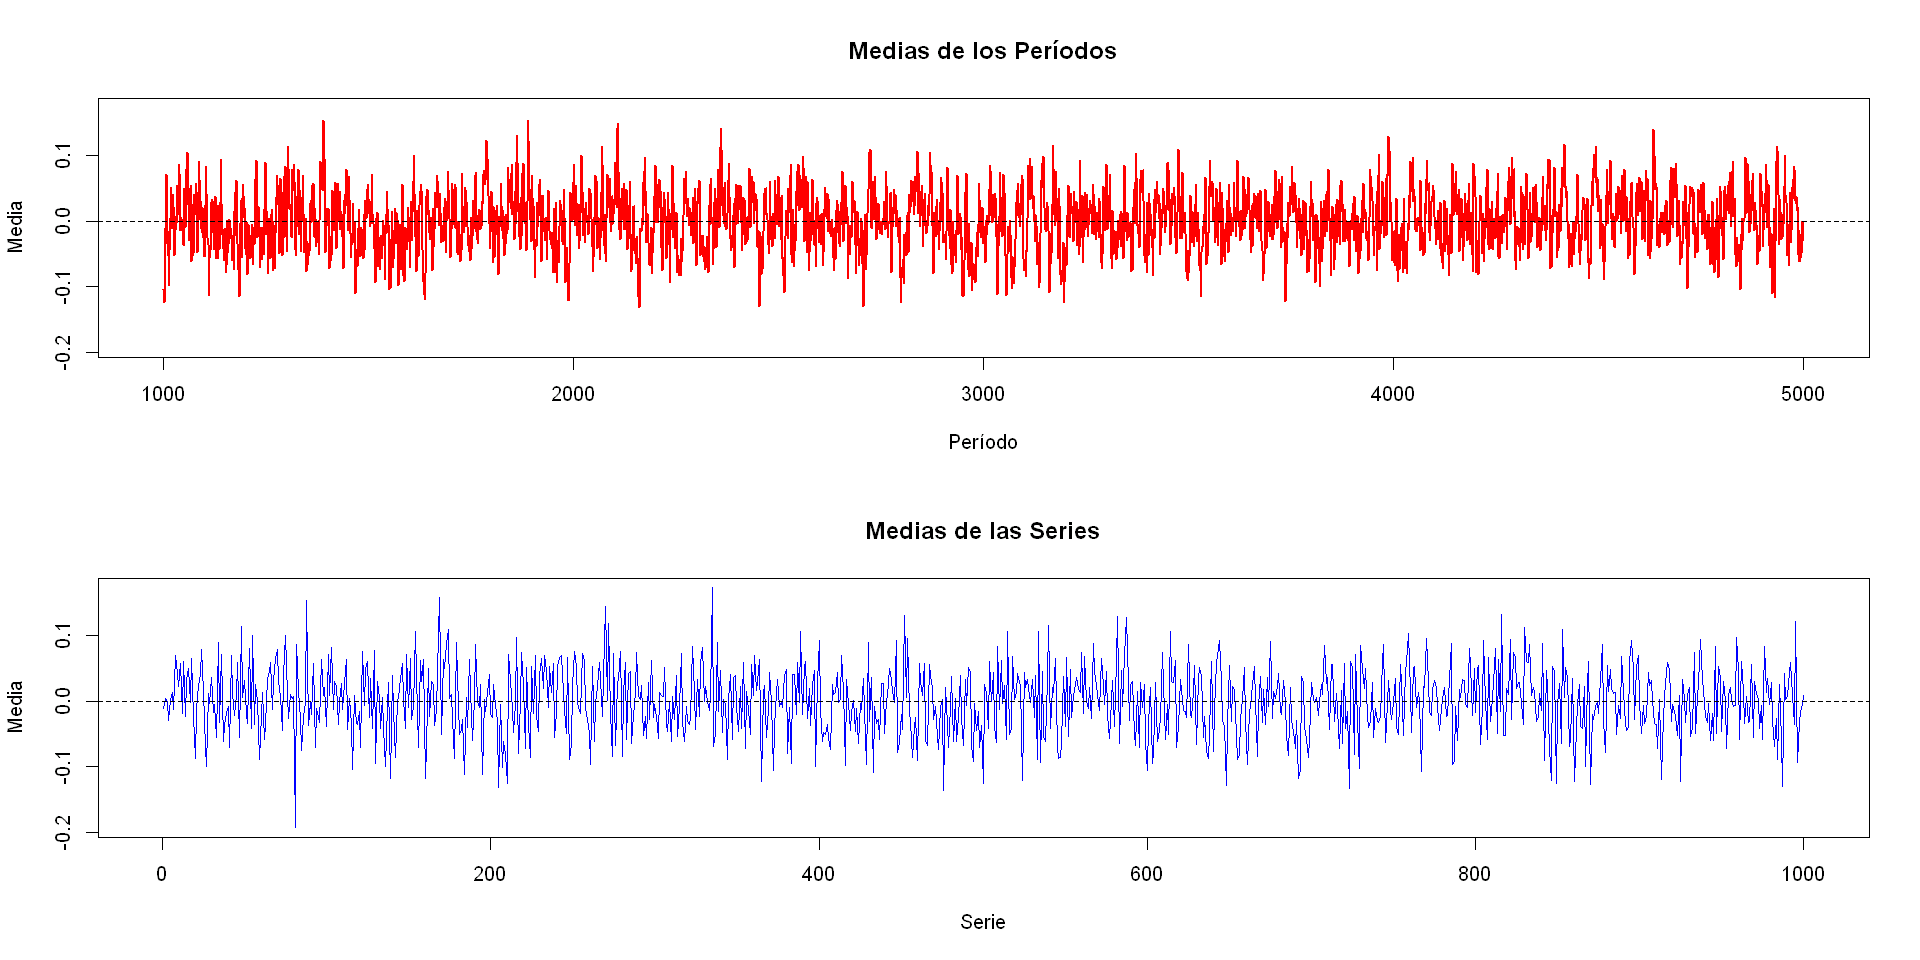

In [24]:
# Definir el rango de los valores en el eje Y para mantener consistencia
y_min <- min(c(matriz_medias_s, matriz_medias_n), na.rm = TRUE)
y_max <- max(c(matriz_medias_s, matriz_medias_n), na.rm = TRUE)

# Ajustar tamaño del gráfico
options(repr.plot.width = 16, repr.plot.height = 8)

# Configurar gráficos en 2 filas y 1 columna
par(mfrow = c(2, 1))

# Gráfico 1: Medias de cada período a lo largo de las series
plot(as.numeric(rownames(series_trimmed)), as.numeric(matriz_medias_n),
    type = "l", col = "red", lwd = 2,
    xlab = "Período", ylab = "Media",
    ylim = c(y_min, y_max),
    main = "Medias de los Períodos"
)

# Agregar línea horizontal en y = 0
abline(h = 0, lty = 2, col = "black")

# Gráfico 2: Medias de cada serie a lo largo del tiempo
plot(1:ncol(series_trimmed), as.numeric(matriz_medias_s),
    type = "l", col = "blue", pch = 16, cex = 0.7,
    xlab = "Serie", ylab = "Media",
    ylim = c(y_min, y_max),
    main = "Medias de las Series"
)

# Agregar línea horizontal en y = 0
abline(h = 0, lty = 2, col = "black")


Si nos fijamos, los valores están distribuidos al rededor de la media (0), para ver esto de manera más gráfica, podemos graficar ambas distribuciones, y observar que convergen a una distribución normal.

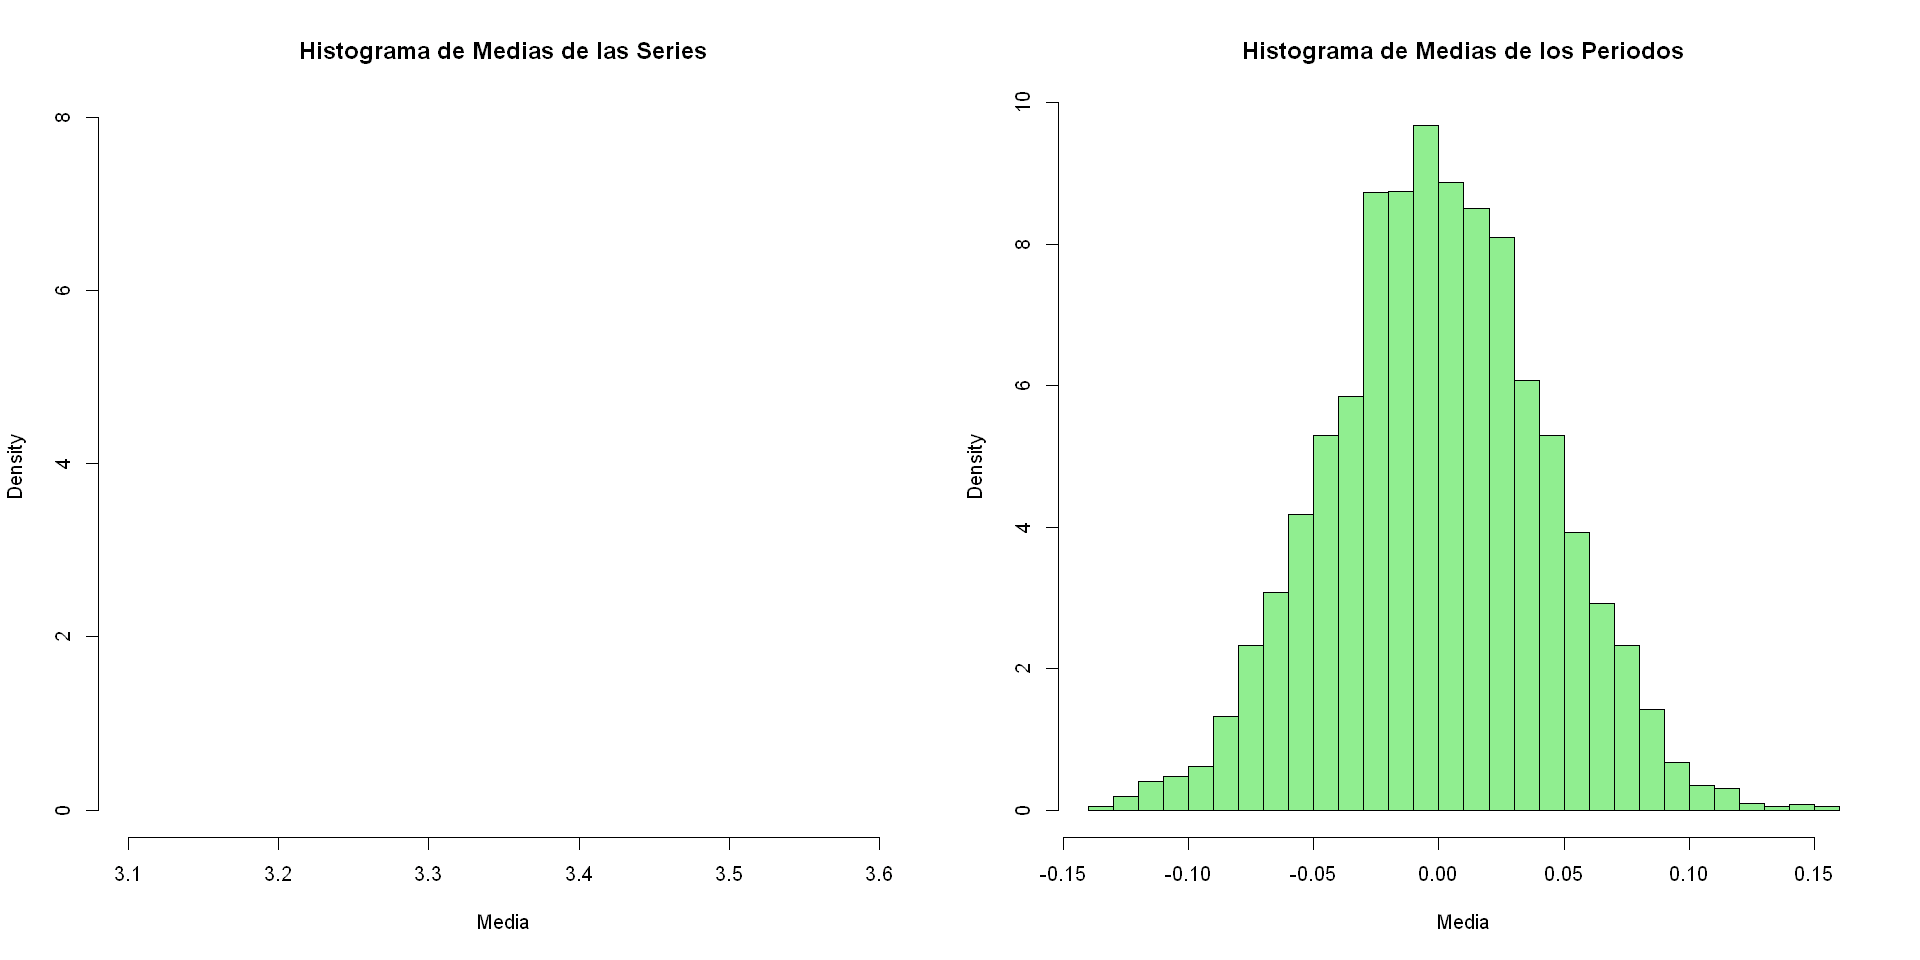

In [25]:
# Ajustar tamaño del gráfico
options(repr.plot.width = 16, repr.plot.height = 8)

# Configurar gráficos en 2 filas y 1 columna
par(mfrow = c(1, 2))

# Histograma con densidad de las medias de las series
hist(as.numeric(matriz_medias_s),
    breaks = 40, col = "lightblue",
    main = "Histograma de Medias de las Series", 
    xlab = "Media", freq = FALSE,
    xlim = c(3.1, 3.6)
)

# Histograma con densidad de las medias de los periodos
hist(as.numeric(matriz_medias_n),
    breaks = 30, col = "lightgreen",
    main = "Histograma de Medias de los Periodos", 
    xlab = "Media", freq = FALSE
)



#### Media en un AR(1) **con intercepto**

Si el proceso AR(1) incluye un intercepto $ a_0 $, la ecuación cambia a:

$$
y_t = a_0 + a_1 y_{t-1} + \varepsilon_t
$$

Tomando expectativas:

$$
E[y_t] = a_0 + a_1 E[y_{t-1}] + E[\varepsilon_t]
$$

Como $E[\varepsilon_t] = 0$, obtenemos:

$$
E[y_t] = a_0 + a_1 E[y_{t-1}]
$$

Dado que en el equilibrio $E[y_t] = E[y_{t-1}] = \mu$, tenemos:

$$
\mu = a_0 + a_1 \mu
$$

Despejando $\mu$:

$$
\mu (1 - a_1) = a_0
$$

Si $ |a_1| < 1 $, la media teórica del proceso AR(1) con intercepto es:

$$
E[y_t] = \frac{a_0}{1 - a_1}
$$

Esto implica que **el intercepto desplaza la media del proceso** en función de su valor y el coeficiente autoregresivo.


In [26]:
# Generar 1000 series simuladas
series_matrix <- replicate(num_series, gen_ar1(n = 5000, a0 = 1, a1 = 0.7, y0 = 0, mean_error = 0, sd_error = 1))

# Eliminar los primeros 1000 períodos de cada serie
series_trimmed <- series_matrix[1001:5000, ]

# ---- Cálculo de la media teórica del proceso con intercepto ----
# Para esto hay que recordar que previamenete se definió a0 = 1 y a1 = 0.8 (antes de crear la función gen_ar1).
# Cuando llamamos a la funcion gen_ar1, los valores no se reescriben porque existen solo dentro de la funcion, y 
# no interfieren con los los parámetros definidos previamente porque son variables globales.
# Esto lo debemos cambiar para calcular la media teórica a la cual converge este proceso:
a0 <- 1
a1 <- 0.7

mean_theoretical <- a0 / (1 - a1)

# Calculamos la media a lo largo del tiempo para cada periodo
time_means <- rowMeans(series_trimmed)

# Calculamos la media a lo largo de las series para cada periodo
series_means <- colMeans(series_trimmed)

# Comparación de las medias a lo largo del tiempo y de las series
cat("Media a lo largo del tiempo:", sprintf("%.6f", mean(time_means)), "\n")
cat("Media a lo largo de las series:", sprintf("%.6f", mean(series_means)), "\n")
cat("Media teórica:", sprintf("%.6f", mean_theoretical), "\n")


Media a lo largo del tiempo: 3.329766 
Media a lo largo de las series: 3.329766 
Media teórica: 3.333333 


In [27]:
# Calcular la media de cada serie a lo largo del tiempo (más eficiente que un loop)
matriz_medias_s <- matrix(colMeans(series_trimmed, na.rm = TRUE), nrow = 1)

# Calcular la media de cada período a lo largo de las series
matriz_medias_n <- matrix(rowMeans(series_trimmed, na.rm = TRUE), ncol = 1)

# Asignar nombres a las filas y columnas para mejor interpretación
colnames(matriz_medias_s) <- colnames(series_trimmed)
rownames(matriz_medias_n) <- rownames(series_trimmed)
colnames(matriz_medias_n) <- "Promedio_por_periodo"

# Convertir a data.frames para facilitar el manejo de datos
df_medias_s <- as.data.frame(matriz_medias_s)
df_medias_n <- as.data.frame(matriz_medias_n)

# Mostrar el promedio de la serie 994
cat("Media de la serie 994 a lo largo del tiempo:", sprintf("%.6f", matriz_medias_s[1, 994]), "\n")

# Mostrar un resumen de los resultados
cat("Medias de las series:\n")
head(df_medias_s, n = 5)

cat("Medias de los períodos:\n")
head(df_medias_n, n = 5) # Primeros 5 periodos

Media de la serie 994 a lo largo del tiempo: 3.343039 
Medias de las series:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.312619,3.246486,3.37352,3.342023,3.398776,3.237094,3.276053,3.31755,3.384462,3.253811,⋯,3.339331,3.378148,3.398641,3.343039,3.302219,3.38137,3.282896,3.355205,3.285923,3.318788


Medias de los períodos:


,Promedio_por_periodo
,<dbl>
1,3.322846
2,3.300484
3,3.292399
4,3.325033
5,3.364316


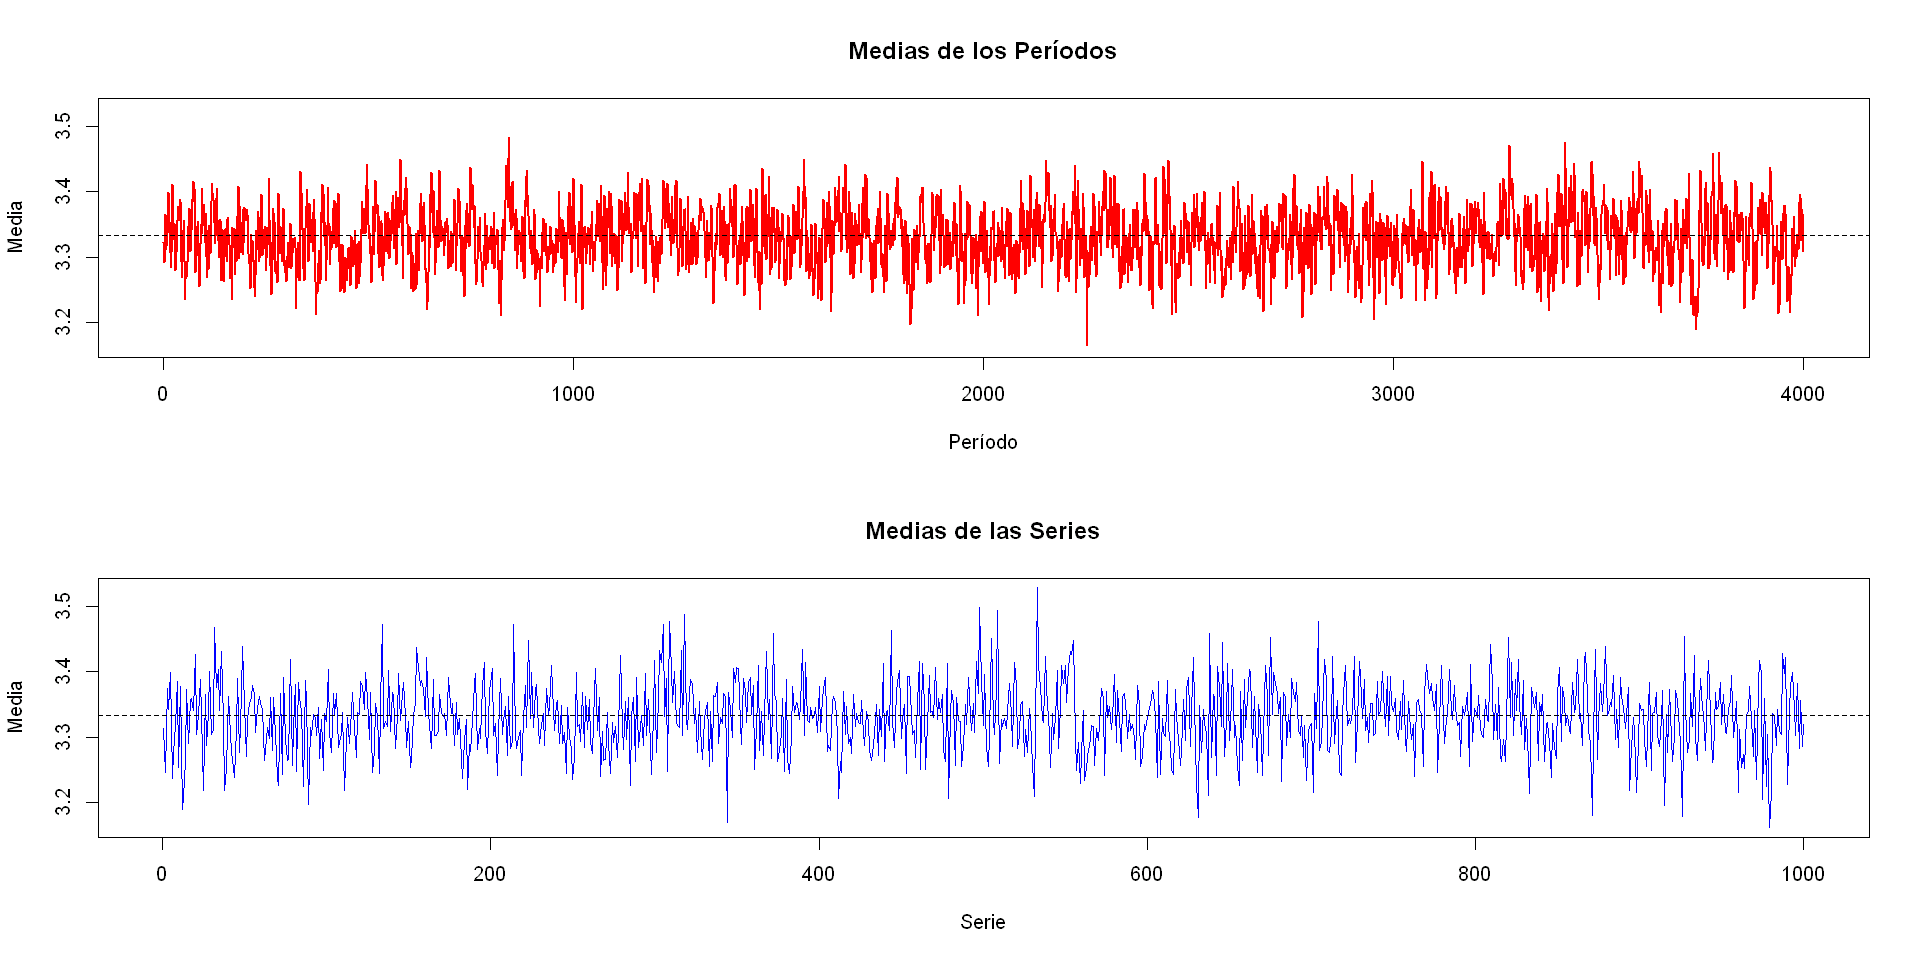

In [31]:
# Definir el rango de los valores en el eje Y para mantener consistencia
y_min <- min(c(matriz_medias_s, matriz_medias_n), na.rm = TRUE)
y_max <- max(c(matriz_medias_s, matriz_medias_n), na.rm = TRUE)

# Ajustar tamaño del gráfico
options(repr.plot.width = 16, repr.plot.height = 8)

# Configurar gráficos en 2 filas y 1 columna
par(mfrow = c(2, 1))

# Verificar y ajustar los índices de los períodos
periodos <- 1:nrow(matriz_medias_n) # Garantiza que x e y tengan el mismo tamaño
medias_periodos <- as.numeric(matriz_medias_n)

# Gráfico 1: Medias de cada período a lo largo de las series
plot(periodos, medias_periodos,
    type = "l", col = "red", lwd = 2,
    xlab = "Período", ylab = "Media",
    ylim = c(y_min, y_max),
    main = "Medias de los Períodos"
)

# Agregar línea horizontal en y = promedio teórico
abline(h = mean_theoretical, lty = 2, col = "black")

# Verificar y ajustar los índices de las series
series <- 1:ncol(series_trimmed) # Asegurar que x e y coincidan
medias_series <- as.numeric(matriz_medias_s)

# Gráfico 2: Medias de cada serie a lo largo del tiempo
plot(series, medias_series,
    type = "l", col = "blue", pch = 16, cex = 0.7,
    xlab = "Serie", ylab = "Media",
    ylim = c(y_min, y_max),
    main = "Medias de las Series"
)

# Agregar línea horizontal en y = promedio teórico
abline(h = mean_theoretical, lty = 2, col = "black")

# Restaurar la configuración de gráficos
par(mfrow = c(1, 1))


Para finalizar, tenemos las distribuciones de ambas medias para ver como convergen al rededor del promedio teórico:

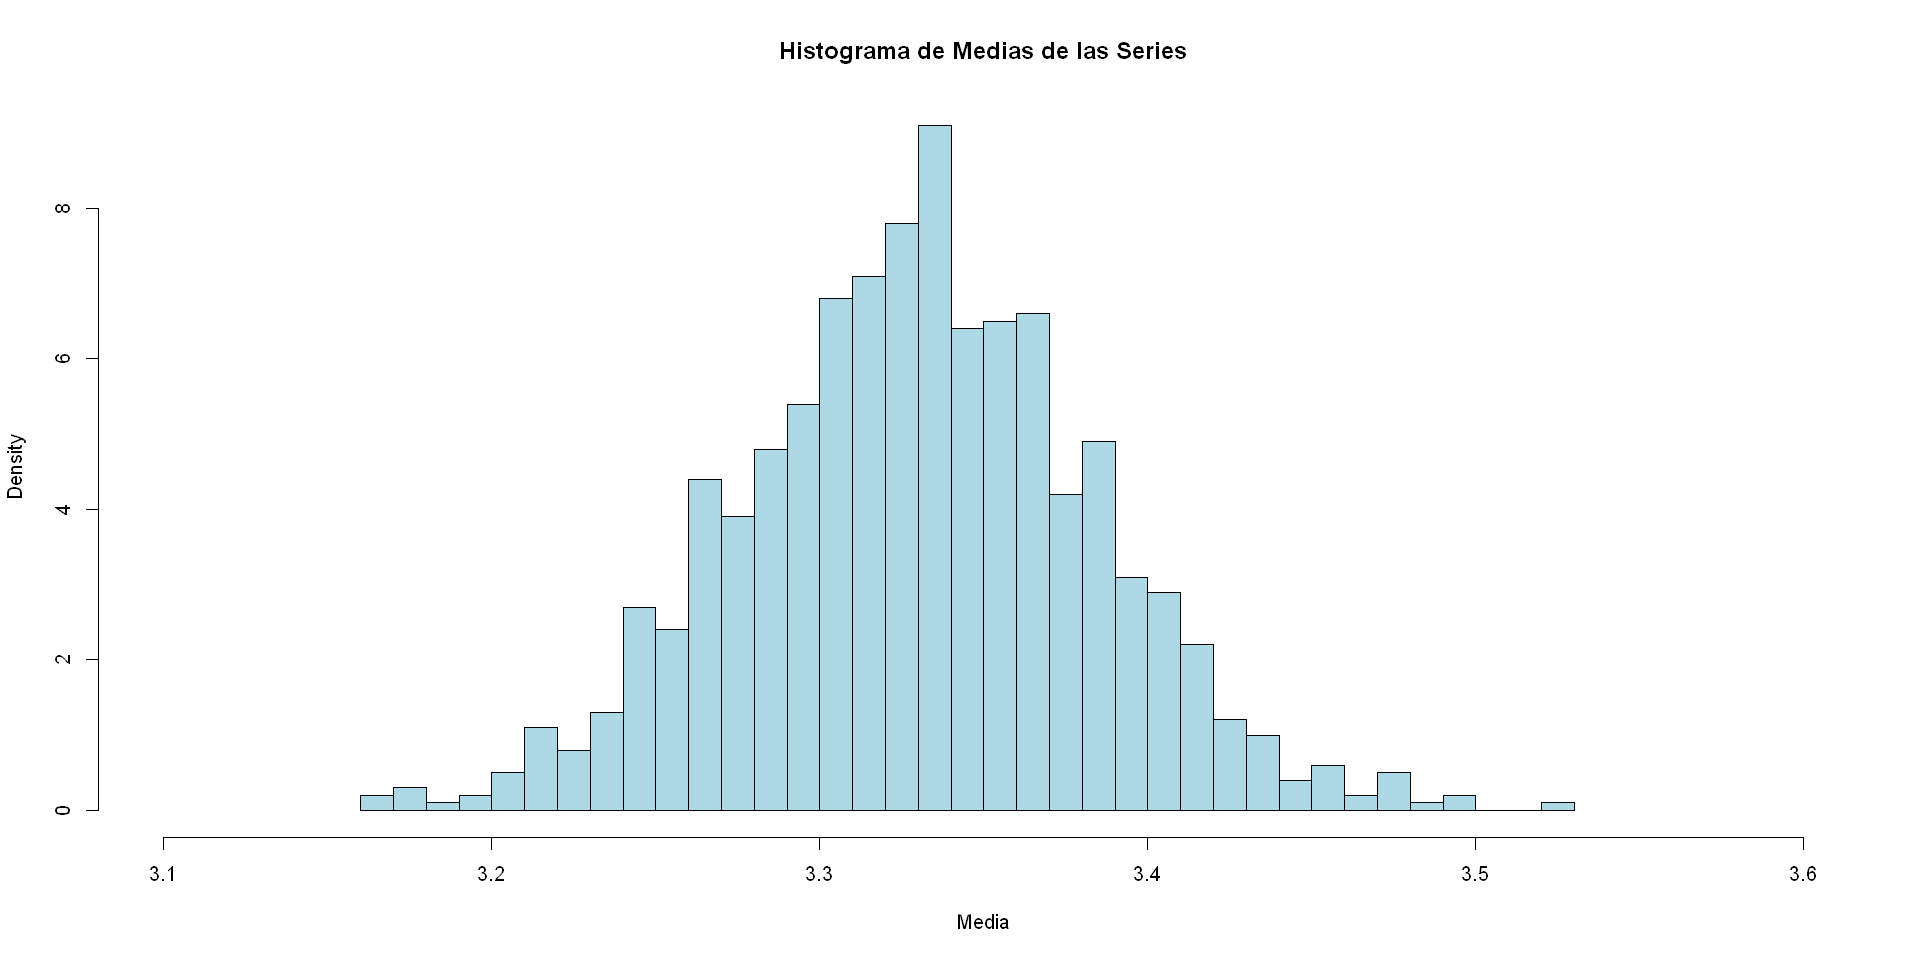

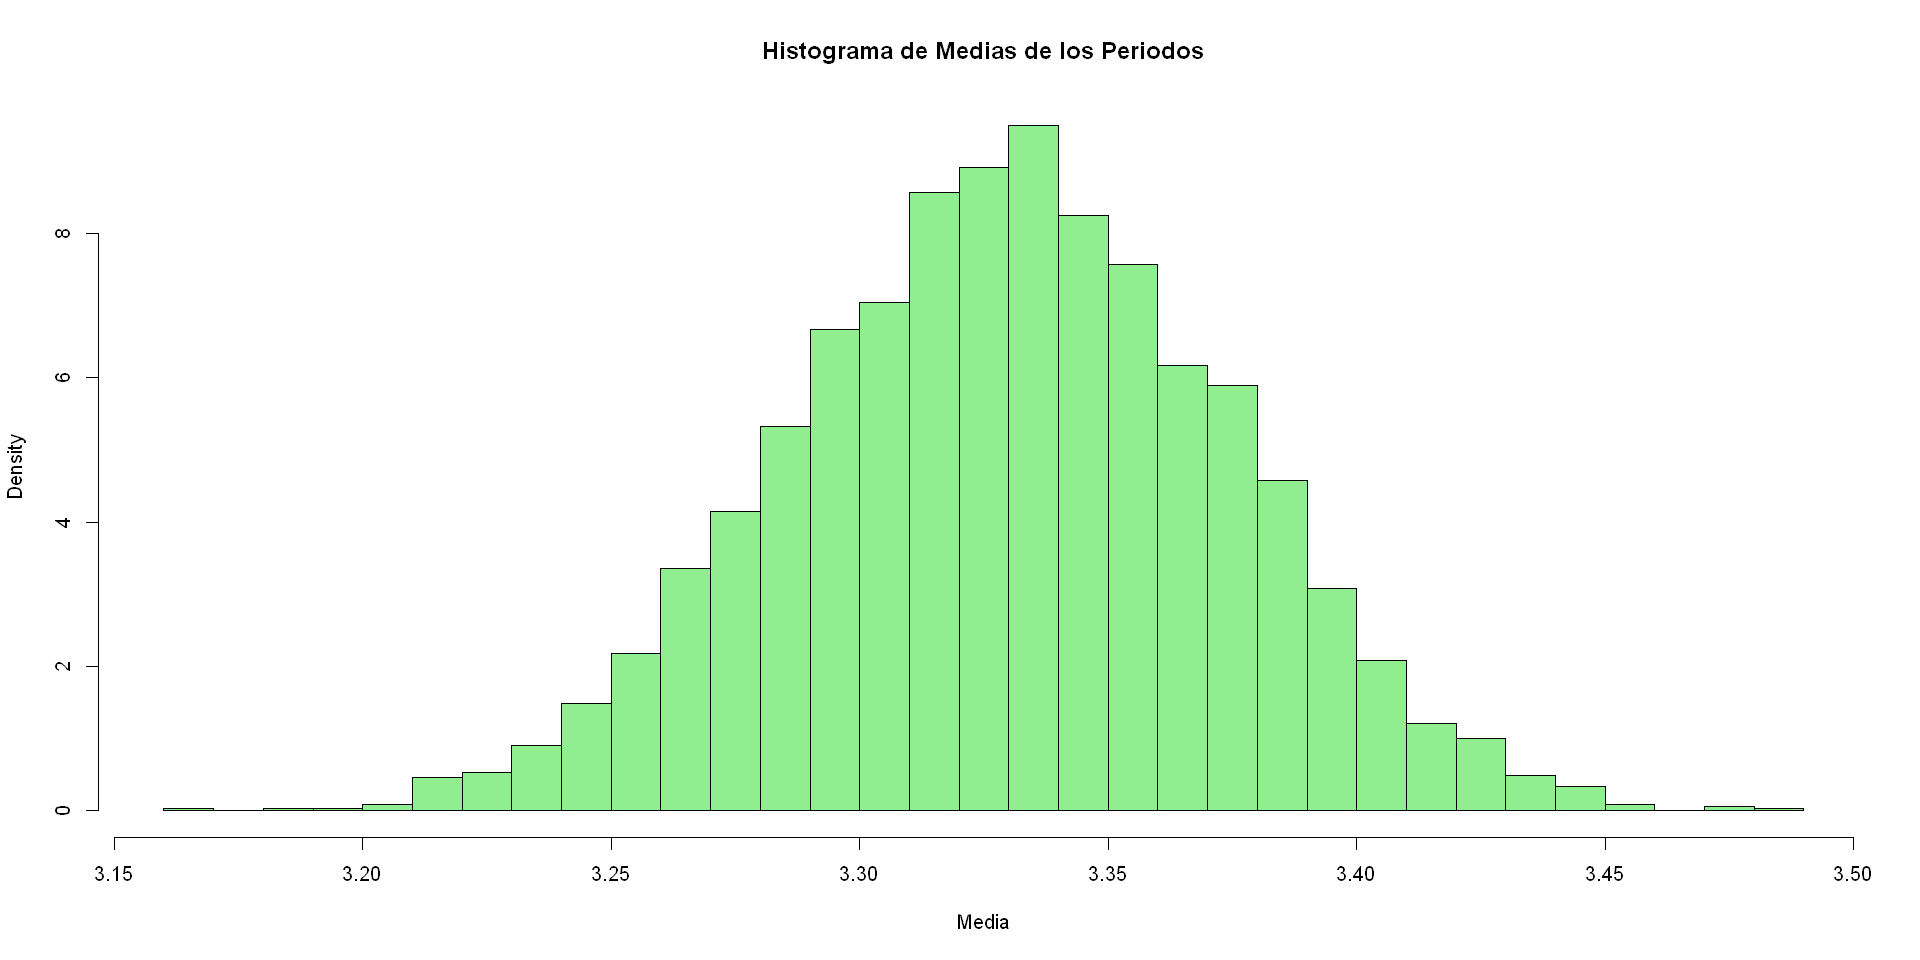

In [35]:
# Graficar ambas distribuciones
hist(as.numeric(matriz_medias_s),
    breaks = 40, col = "lightblue",
    main = "Histograma de Medias de las Series",
    xlab = "Media", freq = FALSE,
    xlim = c(3.1, 3.6)
)

hist(as.numeric(matriz_medias_n),
    breaks = 30, col = "lightgreen",
    main = "Histograma de Medias de los Periodos",
    xlab = "Media", freq = FALSE
)